<a href="https://colab.research.google.com/github/JINJA-E/AI_Ml_Class/blob/master/Study_1020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('mydrive')

ValueError: ignored

In [ ]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import requests

# 2장

In [ ]:
os.listdir() #현재 작업공간 내 파일/폴더 확인

['.config', 'mydrive', 'sample_data']

In [ ]:
os.getcwd() #현재 작업공간 확인

'/content'

In [ ]:
#작업공간 변경
os.chdir('/content/mydrive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/')

In [ ]:
cd /content/mydrive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_02

/content/mydrive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_02


In [ ]:
os.getcwd()

'/content/mydrive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_02'

In [ ]:
data = np.genfromtxt(
    'data/example_data.csv', delimiter=';', 
    names=True, dtype=None, encoding='UTF'
)


#데이터를 딕셔너리 형태로 만들기(컬럼명은 dtype으로)
array_dict = {
    col: np.array([row[i] for row in data])
    for i, col in enumerate(data.dtype.names)
}
array_dict

{'time': array(['2018-10-13 11:10:23.560', '2018-10-13 04:34:15.580',
        '2018-10-13 00:13:46.220', '2018-10-12 21:09:49.240',
        '2018-10-12 02:52:03.620'], dtype='<U23'),
 'place': array(['262km NW of Ozernovskiy, Russia', '25km E of Bitung, Indonesia',
        '42km WNW of Sola, Vanuatu',
        '13km E of Nueva Concepcion, Guatemala',
        '128km SE of Kimbe, Papua New Guinea'], dtype='<U37'),
 'magType': array(['mww', 'mww', 'mww', 'mww', 'mww'], dtype='<U3'),
 'mag': array([6.7, 5.2, 5.7, 5.7, 5.6]),
 'alert': array(['green', 'green', 'green', 'green', 'green'], dtype='<U5'),
 'tsunami': array([1, 0, 0, 0, 1])}

In [ ]:
#mag가 가장 큰 행을 출력
np.array([
    value[array_dict['mag'].argmax()] 
    for key, value in array_dict.items()
])

array(['2018-10-13 11:10:23.560', '262km NW of Ozernovskiy, Russia',
       'mww', '6.7', 'green', '1'], dtype='<U32')

In [ ]:
#True, Choice 중에 랜덤으로 5개 선택
[np.random.choice([True, False]) for _ in range(5)]

[False, False, True, False, False]

In [ ]:
#연속된 5일 날짜 만들기
index=pd.date_range(
        end=dt.date(2019, 4, 21),
        freq='1D',
        periods=5, 
        name='date'
    )
index

DatetimeIndex(['2019-04-17', '2019-04-18', '2019-04-19', '2019-04-20',
               '2019-04-21'],
              dtype='datetime64[ns]', name='date', freq='D')

In [ ]:
#
list_of_tuples = [(n, n**2, n**3) for n in range(5)]

pd.DataFrame(
    list_of_tuples, 
    columns=['n', 'n_squared', 'n_cubed']
)

,n,n_squared,n_cubed
0,0,0,0
1,1,1,1
2,2,4,8
3,3,9,27
4,4,16,64


In [ ]:
#!wc는 word count의 약자
#-l는 파일내 행 수을 출력하는 것
!wc -l data/earthquakes.csv

9333 data/earthquakes.csv


In [ ]:
df = pd.read_csv(
    'https://github.com/stefmolin/'
    'Hands-On-Data-Analysis-with-Pandas-2nd-edition'
    '/blob/master/ch_02/data/earthquakes.csv?raw=True'
)

Pandas is usually very good at figuring out which options to use based on the input data, so we often won't need to add arguments to the call; however, there are many options available should we need them, some of which include the following:

| Parameter | Purpose |
| --- | --- |
| `sep` | Specifies the delimiter |
| `header` | Row number where the column names are located; the default option has `pandas` infer whether they are present |
| `names` | List of column names to use as the header |
| `index_col` | Column to use as the index |
| `usecols` | Specifies which columns to read in |
| `dtype` | Specifies data types for the columns | 
| `converters` | Specifies functions for converting data in certain columns |
| `skiprows` | Rows to skip |
| `nrows` | Number of rows to read at a time (combine with `skiprows` to read a file bit by bit) |
| `parse_dates` | Automatically parse columns containing dates into datetime objects |
| `chunksize` | For reading the file in chunks |
| `compression` | For reading in compressed files without extracting beforehand |
| `encoding` | Specifies the file encoding |



In [ ]:
#SQL 하나도 모르겠어.. db연결어떻게해?

import sqlite3

with sqlite3.connect('data/quakes.db') as connection:
    pd.read_csv('data/tsunamis.csv').to_sql(
        'tsunamis', connection, index=False, if_exists='replace'
    )

#방법2
#import sqlite3

#with sqlite3.connect('data/quakes.db') as connection:
#    tsunamis = pd.read_sql('SELECT * FROM tsunamis', connection)

In [ ]:
#어제 날짜
yesterday = dt.date.today() - dt.timedelta(days=1)
yesterday

datetime.date(2022, 10, 4)

In [ ]:
#API로부터 데이터 얻기
yesterday = dt.date.today() - dt.timedelta(days=1)
api = 'https://earthquake.usgs.gov/fdsnws/event/1/query'
payload = {
    'format': 'geojson',
    'starttime': yesterday - dt.timedelta(days=30),
    'endtime': yesterday
}
response = requests.get(api, params=payload)
earthquake_json = response.json()

earthquake_properties_data = [
    quake['properties'] for quake in earthquake_json['features']
]
df = pd.DataFrame(earthquake_properties_data)
df.head()

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
0,0.87,"8km NW of The Geysers, CA",1664841265730,1664841361627,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nc73789116,",",nc,",",nearby-cities,origin,phase-data,",19.0,0.008963,0.02,68.0,md,earthquake,"M 0.9 - 8km NW of The Geysers, CA"
1,4.80,"13 km SE of Murindó, Colombia",1664840999984,1664845105269,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.0,3.1,NaN,...,",us6000iqkx,",",us,",",dyfi,moment-tensor,origin,phase-data,",87.0,1.383000,0.69,90.0,mwr,earthquake,"M 4.8 - 13 km SE of Murindó, Colombia"
2,1.25,"24km NNW of Tehachapi, CA",1664840562460,1664842859957,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ci40355296,",",ci,",",nearby-cities,origin,phase-data,scitech-link,",21.0,0.115000,0.14,77.0,ml,earthquake,"M 1.3 - 24km NNW of Tehachapi, CA"
3,0.23,"6km W of Cobb, CA",1664840324380,1664842108003,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nc73789111,",",nc,",",nearby-cities,origin,phase-data,",13.0,0.012970,0.03,102.0,md,earthquake,"M 0.2 - 6km W of Cobb, CA"
4,0.39,"6km NNW of The Geysers, CA",1664840250680,1664841865344,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nc73789106,",",nc,",",nearby-cities,origin,phase-data,",16.0,0.012430,0.02,75.0,md,earthquake,"M 0.4 - 6km NNW of The Geysers, CA"


In [ ]:
df = pd.read_csv('data/earthquakes.csv')
print('shape : ',df.shape) 
print('columns: 'df.columns)
#df.head()
#df.tail()
#df.info()
#df.describe(percentiles=[0.05, 0.95]) #%출력부분만 따로설정하는거
#df.describe(include=np.object ) # or 'object'

| Method | Description | Data types |
| --- | --- | --- |
| `count()` | The number of non-null observations | Any |
| `nunique()` | The number of unique values | Any |
| `sum()` | The total of the values | Numerical or Boolean |
| `mean()` | The average of the values | Numerical or Boolean |
| `median()` | The median of the values | Numerical |
| `min()` | The minimum of the values | Numerical |
| `idxmin()` | The index where the minimum values occurs | Numerical |
| `max()` | The maximum of the values | Numerical |
| `idxmax()` | The index where the maximum value occurs | Numerical |
| `abs()` | The absolute values of the data | Numerical |
| `std()` | The standard deviation | Numerical |
| `var()` | The variance |  Numerical |
| `cov()` | The covariance between two `Series`, or a covariance matrix for all column combinations in a `DataFrame` | Numerical |
| `corr()` | The correlation between two `Series`, or a correlation matrix for all column combinations in a `DataFrame` | Numerical |
| `quantile()` | Calculates a specific quantile | Numerical |
| `cumsum()` | The cumulative sum | Numerical or Boolean |
| `cummin()` | The cumulative minimum | Numerical |
| `cummax()` | The cumulative maximum | Numerical |


| Method | Description |
| --- | --- |
| `argmax()`/`argmin()` | Find the location of the maximum/minimum value in the index |
| `equals()` | Compare the index to another `Index` object for equality |
| `isin()` | Check if the index values are in a list of values and return an array of Booleans |
| `max()`/`min()` | Find the maximum/minimum value in the index |
| `nunique()` | Get the number of unique values in the index |
| `to_series()` | Create a `Series` object from the index |
| `unique()` | Find the unique values of the index |
| `value_counts()`| Create a frequency table for the unique values in the index |

In [ ]:
df = pd.read_csv('data/earthquakes.csv')

In [ ]:
#컬럼 이름이 mag로 시작하는 컬럼들로 데이터프레임 만들기
df[[col for col in df.columns if col.startswith('mag')]]
#df.filter(like='mag') #와 같음
#df.filter(regex=r'^t') #t로 시작하는 모든 컬럼을 출력

***Indexing with `loc`***

Selection of the format `loc[row_indexer, column_indexer]` where `:` can be used to select all:

***Indexing with `iloc`***
Exclusive of the endpoint just as Python slicing:

In [ ]:
df.loc[10:15, ['title', 'mag']]
#df.iloc[10:15, 6:10]
#df.at[10, 'mag']
#df.iat[10, 8]
#df.loc[df.mag >= 7.0,['alert', 'mag', 'magType', 'title', 'tsunami', 'type']]
#df.loc[(df.tsunami == 1) & (df.alert == 'red'), #| 넣으면 or
#    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']]
#df.loc[
#    (df.place.str.contains('Alaska')) & (df.alert.notnull()),
#    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']]
#CA를 포함하거나 California를 포함하는거
#df.loc[
#    (df.place.str.contains(r'CA|California$')) & (df.mag > 3.8),
#    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']]
#df.mag.between(6.5, 7.5) #을 이용하면 6.5~7.5 사이 값을 ..! 신기하다
#df.magType.isin(['mw', 'mwb']) #을 이용하면 포함된걸 출력할수있음!
#[df.mag.idxmin(), df.mag.idxmax()] #인덱스 반환
#df.loc[[df.mag.idxmin(), df.mag.idxmax()],
#    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']]

#df['mag_negative'] = df.mag < 0 를 하면 mag보다 작은건 False, 큰건 True

In [ ]:
# $ end * all .word -> 쉼표 뒤에있는 모든 단어들을 추출
df.place.str.extract(r', (.*$)')[0].sort_values().unique()

In [ ]:
#뭔말이지
df['parsed_place'] = df.place.str.replace(
    r'.* of ', '', regex=True # remove anything saying <something> of <something>
).str.replace(
    'the ', '' # remove "the "
).str.replace(
    r'CA$', 'California', regex=True # fix California
).str.replace(
    r'NV$', 'Nevada', regex=True # fix Nevada
).str.replace(
    r'MX$', 'Mexico', regex=True # fix Mexico
).str.replace(
    r' region$', '', regex=True # chop off endings with " region"
).str.replace(
    'northern ', '' # remove "northern "
).str.replace(
    'Fiji Islands', 'Fiji' # line up the Fiji places
).str.replace(
    r'^.*, ', '', regex=True # remove anything else extraneous from the beginning
).str.strip() # remove any extra spaces

In [ ]:
#컬럼 여러개 생성 (in_ca : california로 끝나면 True)
df.assign(
    in_ca=df.parsed_place.str.endswith('California'),
    in_alaska=df.parsed_place.str.endswith('Alaska')
).sample(5, random_state=0)

In [ ]:
#no_tsunami에만 있는 컬럼 earthquake는 join='inner'를 사용시 적용이 안돼
#같은 컬럼만 가져오는거. outer를 적용하면 다 가져옴
pd.concat(
    [tsunami.head(2), no_tsunami.head(2).assign(type='earthquake')], join='inner', ignore_index=True
)

In [ ]:
#컬럼지우기
del df['source']
#컬럼빼내오기
mag_negative = df.pop('mag_negative')

In [ ]:
cols_to_drop = [
    col for col in df.columns
    if col not in ['alert', 'mag', 'title', 'time', 'tsunami']
]

In [ ]:
cols_to_drop

# 2장 실습

create a data frame that specify your team member

variables should be 'name', 'hobby', 'nationality'

In [ ]:
dict_Team1 = {'Name' : ['장영진', '이상민', '김진재', '장효정'],
              'Nationality' : ['Korea', 'Korea', 'Korea', 'Korea'],
              'Hobby' : ['Listening_Music','Reading_Books','Traveling','Sleeping'],
              'MajorIn' : ['Statistics','Mathematics','Statistics','Statistics']}

df_1 = pd.DataFrame(dict_Team1)

In [ ]:
df_1

,Name,Nationality,Hobby,MajorIn
0,장영진,Korea,Listening_Music,Statistics
1,이상민,Korea,Reading_Books,Mathematics
2,김진재,Korea,Traveling,Statistics
3,장효정,Korea,Sleeping,Statistics


In [ ]:
df_1.set_index('Name',inplace=True)

load earthquakes data from ch2 code

try loc and iloc function to select 3:10 items for mag, magType, and type variables.

try to find items of location Arizona

try to find 10 largest items of mag variable

In [ ]:
df = pd.read_csv('data/earthquakes.csv')

In [ ]:
df.loc[3:10,['mag','magType','type']]

,mag,magType,type
3,0.44,ml,earthquake
4,2.16,md,earthquake
5,2.61,md,earthquake
6,1.70,ml,earthquake
7,1.13,md,earthquake
8,0.92,md,earthquake
9,4.70,mb,earthquake
10,0.50,ml,earthquake


In [ ]:
df.loc[df.title.str.contains('Arizona')]

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
1062,NaN,NaN,60300227,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.1666,NaN,163.0,",uu60300227,",1.23,ml,...,",uu,",reviewed,1539133978610,"M 1.2 - 7km SSW of Colorado City, Arizona",0,earthquake,",geoserve,origin,phase-data,",-420.0,1539196068710,https://earthquake.usgs.gov/earthquakes/eventp...
3965,NaN,NaN,60298572,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.1577,NaN,211.0,",uu60298572,",0.94,md,...,",uu,",reviewed,1538383710020,"M 0.9 - 7km WSW of Colorado City, Arizona",0,earthquake,",geoserve,origin,phase-data,",-420.0,1538516934720,https://earthquake.usgs.gov/earthquakes/eventp...


In [ ]:
df.nlargest(10,'mag')[['mag','magType','type']]

,mag,magType,type
5263,7.5,mww,earthquake
837,7.0,mww,earthquake
118,6.7,mww,earthquake
4363,6.7,mww,earthquake
799,6.5,mww,earthquake
816,6.2,mww,earthquake
838,6.1,mb,earthquake
5323,6.1,mww,earthquake
862,6.0,mww,earthquake
1267,6.0,mww,earthquake


try to delete alert variable

try to pop mag and magType variables one at a time with name mag, and magType

Concatenate mag and magType variables and define a new DataFrame using .concat function

In [ ]:
del df['alert']

In [ ]:
df.columns

Index(['cdi', 'code', 'detail', 'dmin', 'felt', 'gap', 'ids', 'mag', 'magType',
       'mmi', 'net', 'nst', 'place', 'rms', 'sig', 'sources', 'status', 'time',
       'title', 'tsunami', 'type', 'types', 'tz', 'updated', 'url'],
      dtype='object')

In [ ]:
mag = df.pop('mag')
magType = df.pop('magType')

In [ ]:
magType

0       ml
1       ml
2       ml
3       ml
4       md
        ..
9327    md
9328    ml
9329    md
9330    ml
9331    ml
Name: magType, Length: 9332, dtype: object

In [ ]:
df_new = pd.concat([mag,magType],axis=1)
df_new

,mag,magType
0,1.35,ml
1,1.29,ml
2,3.42,ml
3,0.44,ml
4,2.16,md
...,...,...
9327,0.62,md
9328,1.00,ml
9329,2.40,md
9330,1.10,ml


# 3장

1-wide_vs_long.ipynb: discusses wide versus long format data

2-using_the_weather_api.ipynb: walks through collecting daily temperature data from the NCEI API

3-cleaning_data.ipynb: shows how to perform some initial data cleaning

4-reshaping_data.ipynb: illustrates how to reshape data with pandas

5-handling_data_issues.ipynb: showcases strategies for dealing with duplicate, missing, or invalid data

In [ ]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#작업공간 변경
os.chdir('/content/mydrive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/')

In [ ]:
cd ch_03

/content/mydrive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_03


In [ ]:
wide_df = pd.read_csv('data/wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv(
    'data/long_data.csv', 
    usecols=['date', 'datatype', 'value'], 
    parse_dates=['date']
)[['date', 'datatype', 'value']] # sort columns

In [ ]:
long_df.head(3)

,date,datatype,value
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9


In [ ]:
wide_df.head(3)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1


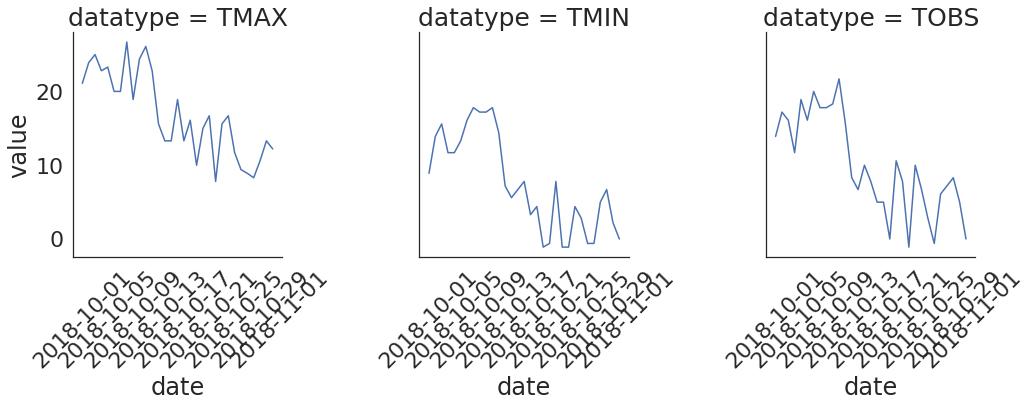

In [ ]:
sns.set(
    rc={'figure.figsize': (20, 10)}, style='white', font_scale=2
)

g = sns.FacetGrid(long_df, col='datatype', height=5) #글자크기,,? 뭐 그런건가 커질수록 작아지네
g = g.map(plt.plot, 'date', 'value') #plt.plot에 date랑 value를 매핑시켜서 그리기..
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()

In [ ]:
df = pd.read_csv('data/nyc_temperatures.csv')
#컬럼 이름 바꾸기
df.rename(
    columns={
        'value': 'temp_C',
        'attributes': 'flags'
    }, inplace=True
)
#컬럼 대문자로 모두 바꾸기
df.rename(str.upper, axis='columns').columns

Index(['DATE', 'DATATYPE', 'STATION', 'FLAGS', 'TEMP_C'], dtype='object')

In [ ]:
df.head(2)

,date,datatype,station,flags,temp_C
0,2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
1,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6


In [ ]:
df = df.assign(
    date=lambda x: pd.to_datetime(x.date),
    temp_C_whole=lambda x: x.temp_C.astype('int'),
    temp_F=lambda x: (x.temp_C * 9/5) + 32,
    temp_F_whole=lambda x: x.temp_F.astype('int')
)

df.head()

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


In [ ]:
df_with_categories = df.assign(
    station=df.station.astype('category'),
    datatype=df.datatype.astype('category')
)
df_with_categories.dtypes

date            datetime64[ns]
datatype              category
station               category
flags                   object
temp_C                 float64
temp_C_whole             int64
temp_F                 float64
temp_F_whole             int64
dtype: object

In [ ]:
#컬럼두개도 정렬한꺼번에 가능함!
df[df.datatype == 'TMAX'].sort_values(by=['temp_C', 'date'], ascending=[False, True]).head(10)
#ignore_index = True
df[df.datatype == 'TMAX'].sort_values(by=['temp_C', 'date'], ascending=[False, True], ignore_index=True).head(10)
#temp_C가 가장 큰 10개 컬럼에 대해서만
df[df.datatype == 'TAVG'].nlargest(n=10, columns='temp_C')
#가장 작은 두개의 컬럼도 이용가능함!
df.nsmallest(n=5, columns=['temp_C', 'date'])

#컬럼 이름을 알파벳 순서대로 정렬
df.sort_index(axis=1).head()
#그냥 정렬
df.sort_values(by='temp_C')

#index가 date일때, df['colum'] = df.index.day_name()을 이용하면 요일이나와..! 신기해

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
77,2018-10-26,TMIN,GHCND:USW00014732,",,W,2400",5.6,5,42.08,42
65,2018-10-22,TMIN,GHCND:USW00014732,",,W,2400",5.6,5,42.08,42
62,2018-10-21,TMIN,GHCND:USW00014732,",,W,2400",6.1,6,42.98,42
74,2018-10-25,TMIN,GHCND:USW00014732,",,W,2400",6.1,6,42.98,42
53,2018-10-18,TMIN,GHCND:USW00014732,",,W,2400",6.7,6,44.06,44
...,...,...,...,...,...,...,...,...
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82


### Reshaping

* stack : 위에서 아래로 (행방향)
* unstack : 왼쪽에서 오른쪽으로 (열방향)

In [ ]:
import pandas as pd

long_df = pd.read_csv(
    'data/long_data.csv', usecols=['date', 'datatype', 'value']
).rename(
    columns={'value': 'temp_C'}
).assign(
    date=lambda x: pd.to_datetime(x.date),
    temp_F=lambda x: (x.temp_C * 9/5) + 32
)
long_df.head()

,datatype,date,temp_C,temp_F
0,TMAX,2018-10-01,21.1,69.98
1,TMIN,2018-10-01,8.9,48.02
2,TOBS,2018-10-01,13.9,57.02
3,TMAX,2018-10-02,23.9,75.02
4,TMIN,2018-10-02,13.9,57.02


In [ ]:
#index 왼쪽
#columns = 두번째줄컬럼
#values = 첫번째줄컬럼 -> 내부 값

pivoted_df = long_df.pivot(
    index='date', columns='datatype', values=['temp_C', 'temp_F']
)
pivoted_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

In [ ]:
#컬럼두개 불러올수있음
pivoted_df = long_df.pivot(
    index='date', columns='datatype', values=['temp_C', 'temp_F']
)
pivoted_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

In [ ]:
multi_index_df = long_df.set_index(['date', 'datatype'])

In [ ]:
unstacked_df = multi_index_df.unstack()

In [ ]:
unstacked_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

In [ ]:
#set_index를 두개설정해주면 multiindex가능 
#특정 값을 추가함
extra_data = long_df.append([{
    'datatype': 'TAVG', 
    'date': '2018-10-01', 
    'temp_C': 10, 
    'temp_F': 50
}]).set_index(['date', 'datatype']).sort_index()

extra_data['2018-10-01':'2018-10-02']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  


temp_C  temp_F
date       datatype                
2018-10-01 TAVG        10.0   50.00
           TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02
           TOBS        17.2   62.96

In [ ]:
wide_df = pd.read_csv('data/wide_data.csv')

In [ ]:
wide_df.head(5)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9


In [ ]:
melted_df = wide_df.melt(
    id_vars='date',
    value_vars=['TMAX', 'TMIN', 'TOBS'], #melt할 컬럼들
    value_name='temp_C', #값
    var_name='measurement' #컬럼이름
)
melted_df.head()

,date,measurement,temp_C
0,2018-10-01,TMAX,21.1
1,2018-10-02,TMAX,23.9
2,2018-10-03,TMAX,25.0
3,2018-10-04,TMAX,22.8
4,2018-10-05,TMAX,23.3


In [ ]:
df = pd.read_csv('data/dirty_data.csv')

In [ ]:
df[df.inclement_weather == 'NaN'].shape[0] #이거 안된대
df[df.inclement_weather.isna()].shape[0] #이걸로 ㄱㄱ

357

In [ ]:
def get_inf_count(df):
    """Find the number of inf/-inf values per column in the dataframe"""
    return {
        col: df[df[col].isin([np.inf, -np.inf])].shape[0] for col in df.columns
    }
get_inf_count(df)

{'date': 0,
 'station': 0,
 'PRCP': 0,
 'SNOW': 0,
 'SNWD': 577,
 'TMAX': 0,
 'TMIN': 0,
 'TOBS': 0,
 'WESF': 0,
 'inclement_weather': 0}

In [ ]:
pd.DataFrame({
    'np.inf Snow Depth': df[df.SNWD == np.inf].SNOW.describe(),
    '-np.inf Snow Depth': df[df.SNWD == -np.inf].SNOW.describe()
}).T

In [ ]:
df[df.duplicated()].shape[0]

284

In [ ]:
df[df.duplicated(keep=False)].shape[0]

482

In [ ]:
# 1. make the date a datetime
df.date = pd.to_datetime(df.date)

# 2. save this information for later
station_qm_wesf = df[df.station == '?'].drop_duplicates('date').set_index('date').WESF

# 3. sort ? to the bottom
df.sort_values('station', ascending=False, inplace=True)

# 4. drop duplicates based on the date column keeping the first occurrence 
# which will be the valid station if it has data
df_deduped = df.drop_duplicates('date')

# 5. remove the station column because we are done with it
df_deduped = df_deduped.drop(columns='station').set_index('date').sort_index()

# 6. take valid station's WESF and fall back on station ? if it is null
df_deduped = df_deduped.assign(
    WESF=lambda x: x.WESF.combine_first(station_qm_wesf)
)

df_deduped.shape

In [ ]:
#모든 열이 결측치인것만 제외
df_deduped.dropna(how='all').shape

#base -> df_deduped.dropna().shape

NameError: ignored

In [ ]:
# subset에 있는 항목들이 모두 결측치면 제거
df1 =df_deduped.dropna(
    how='all', subset=['inclement_weather', 'SNOW', 'SNWD']
)

In [ ]:
df_deduped.loc[:,'WESF'].fillna(0, inplace=True)

In [ ]:
df_deduped.assign(
    TMAX=lambda x: x.TMAX.fillna(method='ffill'),
    TMIN=lambda x: x.TMIN.fillna(method='ffill')
).head()

We can use `np.nan_to_num()` to turn `np.nan` into 0 and `-np.inf`/`np.inf` into large negative or positive finite numbers:

let's use clip() to enforce a lower bound of zero. 

In [ ]:
df_deduped.assign(
    TMAX=lambda x: x.TMAX.fillna(x.TMAX.median()),
    TMIN=lambda x: x.TMIN.fillna(x.TMIN.median()),
    # average of TMAX and TMIN
    TOBS=lambda x: x.TOBS.fillna((x.TMAX + x.TMIN) / 2)
).head()

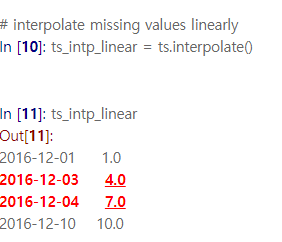

# 3장 실습

Learn pandas dataframe, how to manipulate data, how to merge data

Practice pivoting and unstack

Practice melting and stack

Practice Finding problematic data part

Practice Mitigating Issues part



***stack()***

Another option is stack(), which will pivot the columns of the dataframe into the innermost level of the index (resulting in an index of type MultiIndex). To illustrate this, let's set our index to be the date column:



***melt()***

In order to go from wide format to long format, we use the melt() method. We have to specify:

id_vars: which column(s) uniquely identify a row in the wide format (date, here)
value_vars: the column(s) that contain(s) the values (TMAX, TMIN, and TOBS, here)
Optionally, we can also provide:

value_name: what to call the column that will contain all the values once melted
var_name: what to call the column that will contain the names of the variables being measured

***unstack()***

We have been working with a single index throughout this chapter; however, we can create an index from any number of columns with set_index(). This gives us an index of type MultiIndex, where the outermost level corresponds to the first element in the list provided to set_index():

***pivot()***

We can restructure our data by picking a column to go in the index (index), a column whose unique values will become column names (columns), and the values to place in those columns (values). The pivot() method can be used when we don't need to perform any aggregation in addition to our restructuring (when our index is unique); if this is not the case, we need the pivot_table() method which we will cover in chapter 4

Practice Filtering data

Find all entires where datatype is 'PRCP' and station ID containing 'S0007'

How many unique values in 'attributes' variable?
 - what is the most frequent one?


Practicing Merging DataFrames

try to understand inner, left, right, outer join

# 4장

Ch04
Chapter 4: Aggregating Pandas DataFrames
1-querying_and_merging.ipynb: showcases how to query and merge DataFrame objects

2-dataframe_operations.ipynb: walks through a variety of data enrichment operations, such as binning and window calculations, and how to perform them efficiently with the apply() and pipe() methods

3-aggregations.ipynb: discusses how to perform aggregations on the data, including pivot tables, crosstabs, and calculations based on group membership with the groupby() method

4-time_series.ipynb: illustrates how to work effectively with time series

4.1장
* datatype이 snow고 station에 us1ny가 포함된 것 만 출력
* 두 데이터를 station 을 기준으로 결합
* station이 ?인 행 + wesf, station컬럼 drop하기
* station이 ?인 행을 남기고 해당 컬럼 drop하기
* 합칠 때 이름이 겹치는 컬럼에 대해서 이름붙이기
* 같은 행을 찾아 반환하기

4.2장
* z-score구하고 3이상인것만 출력
* 전날대비수익률이 가장 큰 것부터 출력
* 숫자그대로를가지고 구간을 세개로 나눔
* 개수를 토대로 구간을 세개로 나눔
* 2018년 10월 데이터에 한해, 각각의 컬럼들에 대한 x-평균/표준편차값들
* rolling('3D').sum()은 앞 두 날 + 자기 날의 sum을 나타내줌
* rolling('3D').mean()은 앞 두 날 + 자기 날의 평균 (sum/3) 을 나타내줌
* 주가데이터결측치처리

4.3장
* 소숫점 둘째자리까지 출력하도록 변경
* 각각의변수에대해 다른 함수 적용
* 거래량을 3구간으로 나눠서 각각의 변수에 대해 mean출력
* station_name : 1차 인덱스
* pd.Grouper : 분기별로 합친게 2차 인덱스
* unstack : 1,2차 인덱스를 컬럼과 인덱스로 바꿈
* 어느 달이 가장 sum이 많을까?
* prcp에 대해 value를 평균내고 월별로 sum
* 월별 횟수 출력

4.4장은 시간(시-분 관련)


4장부터는 주석처리 필수!

In [ ]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.chdir('/content/mydrive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_04')

## 수업시간내용들

In [ ]:
dp = weather.query('datatype'==)

Find which quarter had the most rain from the daily precipitation data

In [ ]:
weather = pd.read_csv('data/weather_by_station.csv', index_col='date', parse_dates=True)
weather.head()

,datatype,station,value,station_name
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.0,"STAMFORD 4.2 S, CT US"
2018-01-01,PRCP,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"


In [ ]:
dp = weather.query('datatype == "PRCP"').groupby(level=0).mean()

In [ ]:
weather1 = weather[weather['datatype']=='PRCP'][['value']]

In [ ]:
weather1.loc[:'2018-03-30',:].value.sum()

27592.1

In [ ]:
weather1.loc['2018-03-31',:].sum()

value    77.4
dtype: float64

In [ ]:
dp.groupby(pd.Grouper(freq='Q')).sum()

,value
date,
2018-03-31,364.885769
2018-06-30,334.893094
2018-09-30,546.518380
2018-12-31,473.972345


In [ ]:
dp.groupby(pd.Grouper(freq='Q')).value.count()

date
2018-03-31    90
2018-06-30    91
2018-09-30    92
2018-12-31    92
Freq: Q-DEC, Name: value, dtype: int64

In [ ]:
dp.assign(
        total_prcp_in_q=lambda x: \
            x.groupby(pd.Grouper(freq='M')).transform(np.sum),
        total_day_count_in_q=lambda x: \
          x.groupby(pd.Grouper(freq='Q')).value.transform('count'),
        pct_monthly_prcp=lambda x: \
          x.value.div(x.total_prcp_in_q)
    )

,value,total_prcp_in_q,total_day_count_in_q,pct_monthly_prcp
date,,,,
2018-01-01,0.000000,69.313689,90,0.000000
2018-01-02,0.000000,69.313689,90,0.000000
2018-01-03,0.000000,69.313689,90,0.000000
2018-01-04,4.916071,69.313689,90,0.070925
2018-01-05,12.303571,69.313689,90,0.177506
...,...,...,...,...
2018-12-27,0.000000,157.752434,92,0.000000
2018-12-28,10.462025,157.752434,92,0.066319
2018-12-29,18.655263,157.752434,92,0.118257


In [ ]:
dp.

In [ ]:
dp.assign()

In [ ]:
weather.query('datatype == "PRCP"').groupby(
    ['station_name', pd.Grouper(freq='Q')]
).sum().unstack().sample(5, random_state=1)

value                                 
date                        2018-03-31 2018-06-30 2018-09-30 2018-12-31
station_name                                                           
WANTAGH 1.1 NNE, NY US           279.9      216.8      472.5      277.2
STATEN ISLAND 1.4 SE, NY US      379.4      295.3      438.8      409.9
SYOSSET 2.0 SSW, NY US           323.5      263.3      355.5      459.9
STAMFORD 4.2 S, CT US            338.0      272.1      424.7      390.0
WAYNE TWP 0.8 SSW, NJ US         246.2      295.3      620.9      422.0

##4.1장 querying and merging

In [ ]:
import pandas as pd

weather = pd.read_csv('data/nyc_weather_2018.csv')
weather.head(2)

,date,datatype,station,attributes,value
0,2018-01-01T00:00:00,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0015,",,N,",0.0


In [ ]:
#쿼리로 filtering할때는 컬럼에 따옴표 안 붙여도 됨.
snow_data = weather.query('datatype=="SNOW" and value > 0 and station.str.contains("US1NY")',engine='python')
snow_data.head(2)

,date,datatype,station,attributes,value
114,2018-01-01T00:00:00,SNOW,GHCND:US1NYWC0019,",,N,",25.0
789,2018-01-04T00:00:00,SNOW,GHCND:US1NYNS0007,",,N,",41.0


In [ ]:
#Boolean masks 방법으로 필터링
weather[(weather.datatype=='SNOW')&(weather.value>0)&(weather.station.str.contains('US1NY'))].head(2)

,date,datatype,station,attributes,value
114,2018-01-01T00:00:00,SNOW,GHCND:US1NYWC0019,",,N,",25.0
789,2018-01-04T00:00:00,SNOW,GHCND:US1NYNS0007,",,N,",41.0


In [ ]:
station_info = pd.read_csv('data/weather_stations.csv')
station_info.head(2)

,id,name,latitude,longitude,elevation
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.064100,-73.577000,36.6
1,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",41.037788,-73.568176,6.4


In [ ]:
#id와 station은 같은 station을 의미 id.nunique() > station.nunique()
#station_info.id.describe() #id는 unique() = count()
#weather.station.describe() #station은 unique()< < < < < < count() -> 하나당 여러개

#weather에는 station(merge 앞에 weather이 left니까..) station_info에는 id니까
inner_join = weather.merge(station_info, left_on='station',right_on='id')
inner_join.station.nunique() #weather.nunique() 개수와 동일

110

In [ ]:
# station_info의 id를 station으로 바꾸면 on='station'으로 가볍게 결합가능
weather.merge(station_info.rename(dict(id='station'), axis=1), on='station').sample(2, random_state=0)

,date,datatype,station,attributes,value,name,latitude,longitude,elevation
10739,2018-08-07T00:00:00,SNOW,GHCND:US1NJMN0069,",,N,",0.0,"LONG BRANCH 1.7 SSW, NJ US",40.275368,-74.006027,9.4
45188,2018-12-21T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",16.7,"LAGUARDIA AIRPORT, NY US",40.779440,-73.880350,3.4


아래 두 개의 개수가 똑같은 이유?

id와 station이 모두 같은 것에 대해서만 하기 때문!

In [ ]:
weather.merge(station_info.rename(dict(id='station'), axis=1), on='station').shape[0]

78780

In [ ]:
station_info.merge(weather.rename(dict(station='id'), axis=1), on='id').shape[0]

78780

In [ ]:
left_join = station_info.merge(weather, left_on = 'id', right_on='station',how='left')
right_join = weather.merge(station_info, left_on='station', right_on='id', how='right')

In [ ]:
print(left_join.shape[0],right_join.shape[0])

78949 78949


In [ ]:
#station_info기준 left를 적용하면, station에만 있는 것들은 살아있게됨.
left_join.head(2)

,id,name,latitude,longitude,elevation,date,datatype,station,attributes,value
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.064100,-73.577000,36.6,NaN,NaN,NaN,NaN,NaN
1,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",41.037788,-73.568176,6.4,2018-01-01T00:00:00,PRCP,GHCND:US1CTFR0039,",,N,",0.0


In [ ]:
station_info[station_info.id.str.contains('US1NY')].shape[0]

53

In [ ]:
weather[weather.station.str.contains('US1NY')].shape[0]

11603

In [ ]:
outer_join = weather.merge(station_info, left_on='station',right_on='id',how='outer')

In [ ]:
#outer는 겹치지 않는 것도 모두 출력하는듯!
print(inner_join.shape[0],outer_join.shape[0])

78780 78949


In [ ]:
dirty_data = pd.read_csv('data/dirty_data.csv', index_col='date').drop_duplicates().drop(columns='SNWD')

In [ ]:
#sation이 ?가 아닌 행들만 남김 + wesf, station 컬럼 날림
#뭘 먼저 시행해도 상관없을듯?
valid_station = dirty_data.query('station != "?"').drop(columns=['WESF', 'station'])
station_with_wesf = dirty_data.query('station == "?"').drop(columns=['station', 'TOBS', 'TMIN', 'TMAX'])

In [ ]:
valid_station.head(1)

,PRCP,SNOW,TMAX,TMIN,TOBS,inclement_weather
date,,,,,,
2018-01-02T00:00:00,0.0,0.0,-8.3,-16.1,-12.2,False


In [ ]:
station_with_wesf.head(1)

,PRCP,SNOW,WESF,inclement_weather
date,,,,
2018-01-01T00:00:00,0.0,0.0,NaN,NaN


In [ ]:
#left_index, right_index : 겹치는 컬럼에 대해서는 prcp_x 이렇게 구분을 지어줌
#suffixes는 뒤에 _x, _y가 아니라 어떻게 붙여줄지 설정하는 거
valid_station.merge(
    station_with_wesf, how='left', left_index=True, right_index=True, suffixes=('', '_?')
).query('WESF > 0').head(1)

#join을 활용한 방법
#valid_station.join(station_with_wesf, how='left', rsuffix='_?').query('WESF > 0').head()

In [ ]:
#intersection은 같은 게 있는 걸 찾아 반환
weather.set_index('station', inplace=True)
station_info.set_index('id', inplace=True)
weather.index.intersection(station_info.index)

In [ ]:
#weather.nunique()가 모두 station_info.nunique()에 포함되기 때문
weather.index.difference(station_info.index) #아무것도 반환x
station_info.index.difference(weather.index) #반환함

RangeIndex(start=0, stop=0, step=1)

## 4.2 dataframe_operations

In [ ]:
#parse_dates로 하면 바로 datetime형태로 저장됨
weather = pd.read_csv('data/nyc_weather_2018.csv', parse_dates=['date'])
fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True)

In [ ]:
fb.volume.mean()

27687977.665338647

In [ ]:
#sub는 뺄셈을 의미.div는 나누기를 의미 (값-평균)/표준편차\
#z-score가 3이 넘어가는 것만 출력한다 -> 이상치판단
fb.assign(abs_z_score_volume=lambda x: \
        x.volume.sub(x.volume.mean()).div(x.volume.std()).abs()
).query('abs_z_score_volume > 3')

,open,high,low,close,volume,abs_z_score_volume
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,3.145078
2018-03-20,167.47,170.20,161.95,168.15,129851768,5.315169
2018-03-21,164.80,173.40,163.30,169.39,106598834,4.105413
2018-03-26,160.82,161.10,149.02,160.06,126116634,5.120845
2018-07-26,174.89,180.13,173.75,176.26,169803668,7.393705


In [ ]:
#pct_change()는 전날대비 수익률을 의미,
#rank(ascending=False)를 하면 수익률이 가장 큰 것부터 1이 나옴
fb.assign(
    volume_pct_change=fb.volume.pct_change(),
    pct_change_rank=lambda x: \
        x.volume_pct_change.abs().rank(ascending=False)
).nsmallest(5, 'pct_change_rank')

,open,high,low,close,volume,volume_pct_change,pct_change_rank
date,,,,,,,
2018-01-12,178.06,181.48,177.40,179.37,77551299,7.087876,1.0
2018-03-19,177.01,177.17,170.06,172.56,88140060,2.611789,2.0
2018-07-26,174.89,180.13,173.75,176.26,169803668,1.628841,3.0
2018-09-21,166.64,167.25,162.81,162.93,45994800,1.428956,4.0
2018-03-26,160.82,161.10,149.02,160.06,126116634,1.352496,5.0


In [ ]:
#숫자 그대로를가지고 3구간으로 나눔.
volume_binned = pd.cut(fb.volume, bins=3, labels=['low','med','high'])
volume_binned.value_counts()

low     240
med       8
high      3
Name: volume, dtype: int64

In [ ]:
#개수로 나눔
volume_qbinned = pd.qcut(fb.volume, q=4, labels=['q1', 'q2', 'q3', 'q4'])
volume_qbinned.value_counts()

q1    63
q2    63
q4    63
q3    62
Name: volume, dtype: int64

In [ ]:
central_park_weather = weather\
    .query('station == "GHCND:USW00094728"')\
    .pivot(index='date', columns='datatype', values='value')

In [ ]:
#2018년 10월 데이터에 한해, 각각의 컬럼들에 대한 x-평균/표준편차값들
oct_weather_z_scores = central_park_weather\
    .loc['2018-10', ['TMIN', 'TMAX', 'PRCP']]\
    .apply(lambda x: x.sub(x.mean()).div(x.std()))
oct_weather_z_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
datatype,,,,,,,,
TMIN,31.0,-1.790682e-16,1.0,-1.339112,-0.751019,-0.474269,1.065152,1.843511
TMAX,31.0,1.951844e-16,1.0,-1.305582,-0.870013,-0.138258,1.011643,1.604016
PRCP,31.0,4.655774e-17,1.0,-0.394438,-0.394438,-0.394438,-0.240253,3.936167


In [ ]:
#rolling('3D').sum()은 앞 두 날 + 자기 날의 sum을 나타내줌
#rolling('3D').mean()은 앞 두 날 + 자기 날의 평균 (sum/3) 을 나타내줌
central_park_weather.loc['2018-10'].assign(
    rolling_PRCP=lambda x: x.PRCP.rolling('3D').sum()
)[['PRCP', 'rolling_PRCP']].head(7).T

datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT06,WT08
date,,,,,,,,,,,,,,,
2018-10-01,0.9,0.0,0.0,0.0,24.4,17.2,240.0,230.0,4.0,7.2,NaN,NaN,NaN,NaN,NaN
2018-10-02,0.9,17.5,0.0,0.0,25.0,18.3,300.0,310.0,6.3,10.7,1.0,NaN,1.0,NaN,1.0
2018-10-03,1.1,0.0,0.0,0.0,23.3,17.2,290.0,300.0,4.0,6.7,NaN,NaN,NaN,NaN,NaN
2018-10-04,0.4,1.0,0.0,0.0,24.4,16.1,230.0,200.0,4.0,6.3,1.0,NaN,NaN,NaN,NaN
2018-10-05,1.6,0.0,0.0,0.0,21.7,15.6,20.0,50.0,5.8,8.1,NaN,NaN,NaN,NaN,NaN


In [ ]:
central_park_weather['2018-10-01':'2018-10-07'].rolling('3D').agg(
    {'TMAX': 'max', 'TMIN': 'min', 'AWND': 'mean', 'PRCP': 'sum'}
).join( # join with original data for comparison
    central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']], 
    lsuffix='_rolling'
).sort_index(axis=1) # sort columns so rolling calcs are next to originals

datatype,AWND,AWND_rolling,PRCP,PRCP_rolling,TMAX,TMAX_rolling,TMIN,TMIN_rolling
date,,,,,,,,
2018-10-01,0.9,0.900000,0.0,0.0,24.4,24.4,17.2,17.2
2018-10-02,0.9,0.900000,17.5,17.5,25.0,25.0,18.3,17.2
2018-10-03,1.1,0.966667,0.0,17.5,23.3,25.0,17.2,17.2
2018-10-04,0.4,0.800000,1.0,18.5,24.4,25.0,16.1,16.1
2018-10-05,1.6,1.033333,0.0,1.0,21.7,24.4,15.6,15.6
2018-10-06,0.5,0.833333,0.0,1.0,20.0,24.4,17.2,15.6
2018-10-07,1.1,1.066667,0.0,0.0,26.1,26.1,19.4,15.6


In [ ]:
#주가 데이터 결측치처리
fb_reindexed = fb\
    .reindex(pd.date_range('2018-01-01', '2018-12-31', freq='D'))\
    .assign(
        volume=lambda x: x.volume.fillna(0),
        close=lambda x: x.close.fillna(method='ffill'),
        open=lambda x: x.open.combine_first(x.close),
        high=lambda x: x.high.combine_first(x.close),
        low=lambda x: x.low.combine_first(x.close)
    )
fb_reindexed.assign(day=lambda x: x.index.day_name()).head(10)

,open,high,low,close,volume,day
2018-01-01,NaN,NaN,NaN,NaN,0.0,Monday
2018-01-02,177.68,181.58,177.5500,181.42,18151903.0,Tuesday
2018-01-03,181.88,184.78,181.3300,184.67,16886563.0,Wednesday
2018-01-04,184.90,186.21,184.0996,184.33,13880896.0,Thursday
2018-01-05,185.59,186.90,184.9300,186.85,13574535.0,Friday
2018-01-06,186.85,186.85,186.8500,186.85,0.0,Saturday
2018-01-07,186.85,186.85,186.8500,186.85,0.0,Sunday
2018-01-08,187.20,188.90,186.3300,188.28,17994726.0,Monday
2018-01-09,188.70,188.80,187.1000,187.87,12393057.0,Tuesday
2018-01-10,186.94,187.89,185.6300,187.84,10529894.0,Wednesday


In [ ]:
#pipe, window 관해서 4.2장 참고 ..ㅎ

## 4.3 aggregations

In [ ]:
#소숫점 둘째자리까지만 출력하도록 변경
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
import numpy as np
import pandas as pd

fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True).assign(
    trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'med', 'high'])
)
weather = pd.read_csv('data/weather_by_station.csv', index_col='date', parse_dates=True)
weather.head()


,datatype,station,value,station_name
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.00,"STAMFORD 4.2 S, CT US"
2018-01-01,PRCP,GHCND:US1NJBG0015,0.00,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0015,0.00,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0017,0.00,"GLEN ROCK 0.7 SSE, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0017,0.00,"GLEN ROCK 0.7 SSE, NJ US"


In [ ]:
#agg : 딕셔너리 형태로 여러 컬럼에 대해 각각의 함수를 적용
fb.agg({
    'open': np.mean, 
    'high': np.max, 
    'low': np.min, 
    'close': np.mean, 
    'volume': np.sum
})

open            171.45
high            218.62
low             123.02
close           171.51
volume   6949682394.00
dtype: float64

In [ ]:
fb.agg({
    'open': 'mean',
    'high': ['min', 'max'],
    'low': ['min', 'max'],
    'close': 'mean'
})

,open,high,low,close
mean,171.45,NaN,NaN,171.51
min,NaN,129.74,123.02,NaN
max,NaN,218.62,214.27,NaN


In [ ]:
weather.query('station == "GHCND:USW00094728"')\
    .pivot(columns='datatype', values='value')[['SNOW']].sum()
#아래와 같은코드
weather.query('station == "GHCND:USW00094728"')\
    .pivot(columns='datatype', values='value')[['SNOW']].agg('sum')

datatype
SNOW   1007.00
dtype: float64

In [ ]:
# ex) low전체합 / low전체개수
fb.groupby('trading_volume').mean()

,open,high,low,close,volume
trading_volume,,,,,
low,171.36,173.46,169.31,171.43,24547207.71
med,175.82,179.42,172.11,175.14,79072559.12
high,167.73,170.48,161.57,168.16,141924023.33


In [ ]:
# close를 low, med, high에 대해 각각 min, max mean을 적용
fb.groupby('trading_volume')['close'].agg(['min', 'max', 'mean'])

,min,max,mean
trading_volume,,,
low,124.06,214.67,171.43
med,152.22,217.50,175.14
high,160.06,176.26,168.16


In [ ]:
fb_agg = fb.groupby('trading_volume').agg({
    'open': 'mean',
    'high': ['min', 'max'],
    'low': ['min', 'max'],
    'close': 'mean'
})
fb_agg

open   high           low         close
                 mean    min    max    min    max   mean
trading_volume                                          
low            171.36 129.74 216.20 123.02 212.60 171.43
med            175.82 162.85 218.62 150.75 214.27 175.14
high           167.73 161.10 180.13 149.02 173.75 168.16

In [ ]:
fb_agg.columns

MultiIndex([( 'open', 'mean'),
            ( 'high',  'min'),
            ( 'high',  'max'),
            (  'low',  'min'),
            (  'low',  'max'),
            ('close', 'mean')],
           )

In [ ]:
fb_agg.columns = ['_'.join(col_agg) for col_agg in fb_agg.columns]
fb_agg.head()

In [ ]:
a =('open','mean')

In [ ]:
'_'.join(a)

'open_mean'

In [ ]:
#여기서 level=0을 지정하면 value가 나오는 이유가뭘까 .. ?
weather.loc['2018-10'].query('datatype == "PRCP"')\
    .groupby(level=0).mean().head().squeeze()

,datatype,station,value,station_name
date,,,,
2018-10-01,PRCP,GHCND:US1CTFR0039,0.00,"STAMFORD 4.2 S, CT US"
2018-10-01,PRCP,GHCND:US1NJBG0003,0.00,"TENAFLY 1.3 W, NJ US"
2018-10-01,PRCP,GHCND:US1NJBG0017,0.00,"GLEN ROCK 0.7 SSE, NJ US"
2018-10-01,PRCP,GHCND:US1NJBG0018,0.00,"PALISADES PARK 0.2 WNW, NJ US"
2018-10-01,PRCP,GHCND:US1NJBG0023,0.00,"OAKLAND 0.9 SSE, NJ US"
...,...,...,...,...
2018-10-31,PRCP,GHCND:USW00054787,0.00,"FARMINGDALE REPUBLIC AIRPORT, NY US"
2018-10-31,PRCP,GHCND:USW00094728,0.00,"NY CITY CENTRAL PARK, NY US"
2018-10-31,PRCP,GHCND:USW00094741,0.00,"TETERBORO AIRPORT, NJ US"


In [ ]:
weather.loc['2018-10'].query('datatype == "PRCP"')\
    .groupby(level=0).mean().head().squeeze() #series를 뱉어낸대

date
2018-10-01    0.01
2018-10-02    2.23
2018-10-03   19.69
2018-10-04    0.32
2018-10-05    0.97
Name: value, dtype: float64

In [ ]:
weather.query('datatype == "PRCP"').groupby(
    ['station_name', pd.Grouper(freq='Q')]
).sum()

value
station_name                  date             
ALBERTSON 0.2 SSE, NY US      2018-03-31 359.40
                              2018-06-30 279.90
                              2018-09-30 294.80
                              2018-12-31 405.10
AMITYVILLE 0.1 WSW, NY US     2018-03-31 314.90
...                                         ...
WOODBRIDGE TWP 1.1 NNE, NJ US 2018-12-31 480.70
WOODBRIDGE TWP 3.0 NNW, NJ US 2018-03-31 342.70
                              2018-06-30 372.90
                              2018-09-30 440.10
                              2018-12-31 401.50

[397 rows x 1 columns]

In [ ]:
weather.query('datatype=="PRCP"')

,datatype,station,value,station_name
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.00,"STAMFORD 4.2 S, CT US"
2018-01-01,PRCP,GHCND:US1NJBG0015,0.00,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0017,0.00,"GLEN ROCK 0.7 SSE, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0018,0.00,"PALISADES PARK 0.2 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0023,0.00,"OAKLAND 0.9 SSE, NJ US"
...,...,...,...,...
2018-12-31,PRCP,GHCND:USW00054787,28.70,"FARMINGDALE REPUBLIC AIRPORT, NY US"
2018-12-31,PRCP,GHCND:USW00094728,25.90,"NY CITY CENTRAL PARK, NY US"
2018-12-31,PRCP,GHCND:USW00094741,29.20,"TETERBORO AIRPORT, NJ US"


In [ ]:
#station_name : 1차 인덱스
#pd.Grouper : 분기별로 합친게 2차 인덱스
#unstack : 1,2차 인덱스를 컬럼과 인덱스로 바꿈
weather.query('datatype=="PRCP"').groupby(['station_name',pd.Grouper(freq='Q')]).sum().unstack()

value                                 
date                          2018-03-31 2018-06-30 2018-09-30 2018-12-31
station_name                                                             
ALBERTSON 0.2 SSE, NY US          359.40     279.90     294.80     405.10
AMITYVILLE 0.1 WSW, NY US         314.90     259.60     342.60     383.80
AMITYVILLE 0.6 NNE, NY US         385.70     254.40     471.70     470.20
ARMONK 0.3 SE, NY US              340.70     311.60     574.40     526.80
BLOOMINGDALE 0.7 SSE, NJ US       277.70     331.10     557.50     481.10
...                                  ...        ...        ...        ...
WESTCHESTER CO AIRPORT, NY US     238.00     299.60     540.10     434.70
WESTFIELD 0.6 NE, NJ US           299.10     241.70     525.30     339.90
WOODBRIDGE TWP 1.1 ESE, NJ US     359.60     415.40     576.20     485.40
WOODBRIDGE TWP 1.1 NNE, NJ US     358.60     416.10     586.60     480.70
WOODBRIDGE TWP 3.0 NNW, NJ US     342.70     372.90     440.10     401.50

[109 rows x 4 columns]

In [ ]:
#어느 달이 가장 sum이 많을까?
weather.query('datatype == "PRCP"')\
    .groupby(level=0).mean()\
    .groupby(pd.Grouper(freq='M')).sum().value.nlargest()

date
2018-11-30   210.59
2018-09-30   193.09
2018-08-31   192.45
2018-07-31   160.98
2018-02-28   158.11
Name: value, dtype: float64

In [ ]:
#prcp에 대해 value를 평균내고 월별로 sum
weather.query('datatype == "PRCP"')\
    .rename(dict(value='prcp'), axis=1)\
    .groupby(level=0).mean()\
    .groupby(pd.Grouper(freq='M')).sum()

,prcp
date,
2018-01-31,69.31
2018-02-28,158.11
2018-03-31,137.46
2018-04-30,140.57
2018-05-31,113.38
2018-06-30,80.94
2018-07-31,160.98
2018-08-31,192.45
2018-09-30,193.09


In [ ]:
#모든 날짜의 값을 그 달의 평균으로 바꿈
weather.query('datatype == "PRCP"')\
    .rename(dict(value='prcp'), axis=1)\
    .groupby(level=0).mean()\
    .groupby(pd.Grouper(freq='M')).transform(np.sum)

,prcp
date,
2018-01-01,69.31
2018-01-02,69.31
2018-01-03,69.31
2018-01-04,69.31
2018-01-05,69.31
...,...
2018-12-27,157.75
2018-12-28,157.75
2018-12-29,157.75


In [ ]:
#pct_montly_prcp는 원래값을 그 달의 평균으로 나눈 값
weather\
    .query('datatype == "PRCP"')\
    .rename(dict(value='prcp'), axis=1)\
    .groupby(level=0).mean()\
    .assign(
        total_prcp_in_month=lambda x: \
            x.groupby(pd.Grouper(freq='M')).transform(np.sum),
        pct_monthly_prcp=lambda x: \
            x.prcp.div(x.total_prcp_in_month)
    )\
    .nlargest(5, 'pct_monthly_prcp')

In [ ]:
#값들을 정규화 시킨거..
fb[['open', 'high', 'low', 'close']]\
    .transform(lambda x: (x - x.mean()).div(x.std()))\
    .head()

In [ ]:
#평균인거임
fb.pivot_table(columns='trading_volume')

trading_volume,low,med,high
close,171.43,175.14,168.16
high,173.46,179.42,170.48
low,169.31,172.11,161.57
open,171.36,175.82,167.73
volume,24547207.71,79072559.12,141924023.33


In [ ]:
fb.pivot_table(index='trading_volume')

,close,high,low,open,volume
trading_volume,,,,,
low,171.43,173.46,169.31,171.36,24547207.71
med,175.14,179.42,172.11,175.82,79072559.12
high,168.16,170.48,161.57,167.73,141924023.33


In [ ]:
#아니 이건 너무 어려운거아니냐고
weather.reset_index().pivot_table(
    index=['date', 'station', 'station_name'],columns='datatype',values='value',aggfunc='median'
).reset_index().head()

datatype,date,station,station_name,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
0,2018-01-01,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,GHCND:US1NJBG0015,"NORTH ARLINGTON 0.7 WNW, NJ US",NaN,NaN,NaN,NaN,0.00,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,GHCND:US1NJBG0017,"GLEN ROCK 0.7 SSE, NJ US",NaN,NaN,NaN,NaN,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,GHCND:US1NJBG0018,"PALISADES PARK 0.2 WNW, NJ US",NaN,NaN,NaN,NaN,0.00,0.00,3.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,GHCND:US1NJBG0023,"OAKLAND 0.9 SSE, NJ US",NaN,NaN,NaN,NaN,0.00,0.00,25.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#월별 횟수를 아주 잘 출력할수있음
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month'] # name the columns index
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


In [ ]:
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month'],
    values=fb.close,
    aggfunc=np.mean
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,185.24,180.27,177.07,163.29,182.93,195.27,201.92,177.49,164.38,154.19,141.64,137.16
med,179.37,NaN,164.76,174.16,NaN,NaN,194.28,NaN,NaN,NaN,NaN,NaN
high,NaN,NaN,164.11,NaN,NaN,NaN,176.26,NaN,NaN,NaN,NaN,NaN


In [ ]:
#개어렵네

## 4.4 timeseries

In [ ]:
fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True).assign(
    trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'med', 'high'])
)

In [ ]:
#1분기
fb.loc['2018-q1']

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low
...,...,...,...,...,...,...
2018-03-23,165.44,167.10,159.0200,159.39,53609706,low
2018-03-26,160.82,161.10,149.0200,160.06,126116634,high
2018-03-27,156.31,162.85,150.7500,152.22,79116995,med


In [ ]:
#첫 1주
fb.first('1W')

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low


In [ ]:
#1월1일부터 데이터 꽉 차도록 정리한거
fb_reindexed = fb.reindex(pd.date_range('2018-01-01', '2018-12-31', freq='D'))
#fb_reindexed.loc['2018-Q1'].first_valid_index() #첫 데이터가 존재하는 위치
#fb_reindexed.loc['2018-Q1'].last_valid_index() #마지막 데이턱 존재하는 위치
#fb_reindexed.asof('2018-03-31') #last_valid_index와 같음
fb_reindexed.head(2)

,open,high,low,close,volume,trading_volume
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,177.68,181.58,177.55,181.42,18151903.0,low


In [ ]:
stock_data_per_minute = pd.read_csv(
    'data/fb_week_of_may_20_per_minute.csv', index_col='date', parse_dates=True, 
    date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H-%M')
)

stock_data_per_minute.head(2)

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.62,181.62,181.62,181.62,159049.0
2019-05-20 09:31:00,182.61,182.61,182.61,182.61,468017.0


In [ ]:
#하루로 엮는데 어떤 데이터를 쓸건지?
stock_data_per_minute.groupby(pd.Grouper(freq='1D')).agg({
    'open': 'first', #젤 첫 시간
    'high': 'max',  #고점
    'low': 'min',  #min점
    'close': 'last',  #제일 마지막 시간
    'volume': 'sum' #합
})
#아래코드와 같은듯
stock_data_per_minute.resample('1D').agg({
    'open': 'first',
    'high': 'max', 
    'low': 'min', 
    'close': 'last', 
    'volume': 'sum'
})

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.1800,181.6200,182.72,10044838.0
2019-05-21,184.53,185.5800,183.9700,184.82,7198405.0
2019-05-22,184.81,186.5603,184.0120,185.32,8412433.0
2019-05-23,182.50,183.7300,179.7559,180.87,12479171.0
2019-05-24,182.33,183.5227,181.0400,181.06,7686030.0


In [ ]:
#시간 관련 참고할 코드
stock_data_per_minute.at_time('9:30')
stock_data_per_minute.between_time('15:59', '16:00')

shares_traded_in_first_30_min = stock_data_per_minute\
    .between_time('9:30', '10:00')\
    .groupby(pd.Grouper(freq='1D'))\
    .filter(lambda x: (x.volume > 0).all())\
    .volume.mean()

shares_traded_in_last_30_min = stock_data_per_minute\
    .between_time('15:30', '16:00')\
    .groupby(pd.Grouper(freq='1D'))\
    .filter(lambda x: (x.volume > 0).all())\
    .volume.mean()

shares_traded_in_first_30_min - shares_traded_in_last_30_min

18592.967741935485

In [ ]:
#shift는 앞의 날짜의 close를 가져오나봄
#전날 대비한 증가폭이 절대값으로 가장 큰 값을 불러오는 코드
fb.assign(
    prior_close=lambda x: x.close.shift(),
    after_hours_change_in_price=lambda x: x.open - x.prior_close,
    abs_change=lambda x: x.after_hours_change_in_price.abs()
).nlargest(5, 'abs_change')

,open,high,low,close,volume,trading_volume,prior_close,after_hours_change_in_price,abs_change
date,,,,,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668,high,217.50,-42.61,42.61
2018-04-26,173.22,176.27,170.80,174.16,77556934,med,159.69,13.53,13.53
2018-01-12,178.06,181.48,177.40,179.37,77551299,med,187.77,-9.71,9.71
2018-10-31,155.00,156.40,148.96,151.79,60101251,low,146.22,8.78,8.78
2018-03-19,177.01,177.17,170.06,172.56,88140060,med,185.09,-8.08,8.08


In [ ]:
#오늘 데이터 - 어제 데이터 & trading_vlume 버리기
fb.drop(columns='trading_volume').diff().head()

,open,high,low,close,volume
date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,4.20,3.20,3.7800,3.25,-1265340.0
2018-01-04,3.02,1.43,2.7696,-0.34,-3005667.0
2018-01-05,0.69,0.69,0.8304,2.52,-306361.0
2018-01-08,1.61,2.00,1.4000,1.43,4420191.0


In [ ]:
melted_stock_data = pd.read_csv('data/melted_stock_data.csv', index_col='date', parse_dates=True)
melted_stock_data.head()

,price
date,
2019-05-20 09:30:00,181.6200
2019-05-20 09:31:00,182.6100
2019-05-20 09:32:00,182.7458
2019-05-20 09:33:00,182.9500
2019-05-20 09:34:00,183.0600


In [ ]:
#시간별로 price를 하루 기준으로 close, open, high, low를 만들어줌
melted_stock_data.resample('1D').ohlc()['price']

,open,high,low,close
date,,,,
2019-05-20,181.62,184.1800,181.6200,182.72
2019-05-21,184.53,185.5800,183.9700,184.82
2019-05-22,184.81,186.5603,184.0120,185.32
2019-05-23,182.50,183.7300,179.7559,180.87
2019-05-24,182.33,183.5227,181.0400,181.06


# 4장 실습

https://github.com/CDdohyun/ai4ml/blob/main/w6_practice.ipynb

Find which quarter had the most rain from the daily
precipitation data.
- Assign ‘quarterly total precipitation’ and ‘number of
days in a month’ variables to daily precipitation data.
- Calculate rolling 3day mean precipitation

In [ ]:
weather = pd.read_csv('data/weather_by_station.csv', index_col='date', parse_dates=True)
weather.head()

,datatype,station,value,station_name
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.0,"STAMFORD 4.2 S, CT US"
2018-01-01,PRCP,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
weather.query('station == "GHCND:USW00094728"')\
    .pivot(columns='datatype', values='value')[['SNOW', 'PRCP']]\
    .sum()

datatype
SNOW   1007.00
PRCP   1665.30
dtype: float64

In [ ]:
dp = weather.query('datatype == "PRCP"').groupby(level=0).mean()

In [ ]:
dp.groupby(pd.Grouper(freq='Q')).sum()

,value
date,
2018-03-31,364.89
2018-06-30,334.89
2018-09-30,546.52
2018-12-31,473.97


In [ ]:
dp.groupby(pd.Grouper(freq='Q')).count()

,value
date,
2018-03-31,90
2018-06-30,91
2018-09-30,92
2018-12-31,92


In [ ]:
import numpy as np
dp.assign(
        total_prcp_in_q=lambda x: \
            x.groupby(pd.Grouper(freq='Q')).transform(np.sum),
        total_count_in=lambda x: \
            x.groupby(pd.Grouper(freq='Q')).value.transform('count'),
    )

,value,total_prcp_in_q,total_count_in
date,,,
2018-01-01,0.00,364.89,90
2018-01-02,0.00,364.89,90
2018-01-03,0.00,364.89,90
2018-01-04,4.92,364.89,90
2018-01-05,12.30,364.89,90
...,...,...,...
2018-12-27,0.00,473.97,92
2018-12-28,10.46,473.97,92
2018-12-29,18.66,473.97,92


In [ ]:
fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True).assign(
    trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'med', 'high'])
)
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low
2018-01-04,184.90,186.21,184.10,184.33,13880896,low
2018-01-05,185.59,186.90,184.93,186.85,13574535,low
2018-01-08,187.20,188.90,186.33,188.28,17994726,low


In [ ]:
fb_pt = fb.pivot_table(index='trading_volume', columns=fb.index.month, values='close', aggfunc='count')
fb_pt.columns.name = 'month'
fb_pt

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


# 5장

| Parameter | Purpose | Data Type |
| --- | --- | --- |
| `kind` | Determines the plot type | String |
| `x`/`y` | Column(s) to plot on the *x*-axis/*y*-axis | String or list |
| `ax` | Draws the plot on the `Axes` object provided | `Axes` |
| `subplots` | Determines whether to make subplots | Boolean |
| `layout` | Specifies how to arrange the subplots | Tuple of `(rows, columns)` |
| `figsize` | Size to make the `Figure` object | Tuple of `(width, height)` | 
| `title` | The title of the plot or subplots | String for the plot title or a list of strings for subplot titles |
| `legend` | Determines whether to show the legend | Boolean |
| `label` | What to call an item in the legend | String if a single column is being plotted; otherwise, a list of strings |
| `style` | `matplotlib` style strings for each item being plotted | String if a single column is being plotted; otherwise, a list of strings |
| `color` | The color to plot the item in | String or red, green, blue tuple if a single column is being plotted; otherwise, a list |
| `colormap` | The colormap to use | String or `matplotlib` colormap object |
| `logx`/`logy`/`loglog` | Determines whether to use a logarithmic scale for the *x*-axis, *y*-axis, or both | Boolean |
| `xticks`/`yticks` | Determines where to draw the ticks on the *x*-axis/*y*-axis | List of values |
| `xlim`/`ylim` | The axis limits for the *x*-axis/*y*-axis | Tuple of the form `(min, max)` |
| `rot` | The angle to write the tick labels at | Integer |
| `sharex`/`sharey` | Determines whether to have subplots share the *x*-axis/*y*-axis | Boolean |
| `fontsize` | Controls the size of the tick labels | Integer |
| `grid` | Turns on/off the grid lines | Boolean |

In [ ]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.chdir('/content/mydrive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05')

## 5.1장

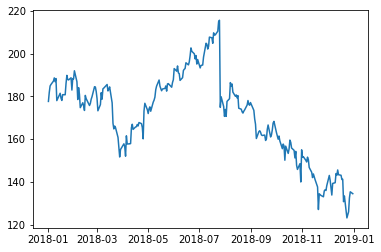

In [ ]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

plt.plot(fb.index, fb.open)
plt.show()

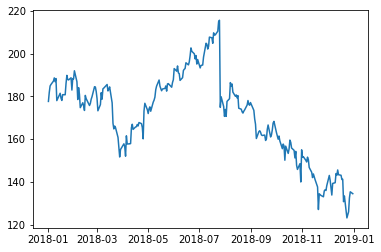

In [ ]:
#jupyter notebook에서 사용하기 때문에, 화면에 바로 보여지도록 할 수 있는 것이 바로 아랫줄
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
plt.plot(fb.index, fb.open)

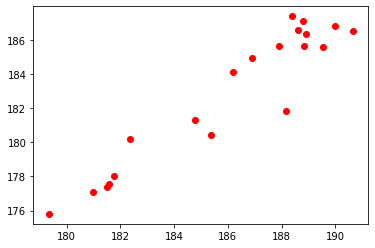

In [ ]:
#'or' : red scatter plot
plt.plot('high', 'low', 'or', data=fb.head(20))

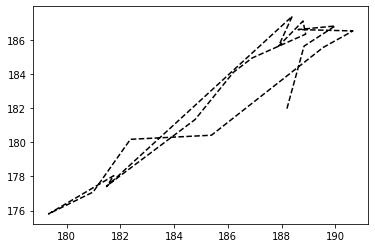

In [ ]:
#'--k' is a black dashed line
plt.plot('high', 'low', '--k', data=fb.head(20))


| Marker | Linestyle | Color | Format String | Result |
| :---: | :---: | :---: | :---: | --- |
| | `-` | `b` | `-b` | blue solid line|
| `.` |  | `k` | `.k` | black points|
|  | `--` | `r` | `--r` | red dashed line|
| `o` | `-` | `g` | `o-g` | green solid line with circles|
| | `:` | `m` | `:m` | magenta dotted line|
|`x` | `-.` | `c` | `x-.c` | cyan dot-dashed line with x's|

In [ ]:
quakes = pd.read_csv('data/earthquakes.csv')

In [ ]:
quakes.head(2)

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California


히스토그램

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <a list of 10 Patch objects>)

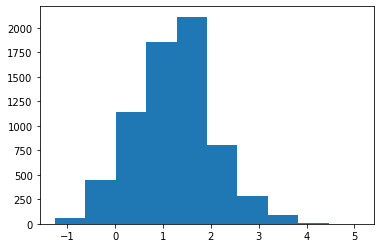

In [ ]:
#mapType이 ml인 것의 mag만 히스토그램
plt.hist(quakes.query('magType == "ml"').mag)

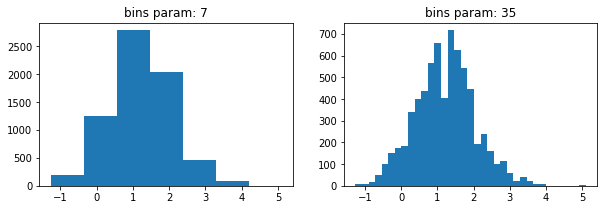

In [ ]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, bins in zip(axes, [7, 35]):
    ax.hist(x, bins=bins)
    ax.set_title(f'bins param: {bins}')

### plt 하나씩 알아보기

In [ ]:
fig = plt.figure() #사이즈지정할때 plt.plot(figsize=(20,10)) 사이즈가나오지

<Figure size 432x288 with 0 Axes>

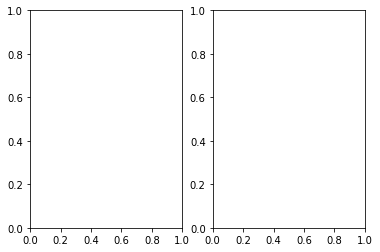

In [ ]:
#subplot 만들기
fig, axes = plt.subplots(1, 2)

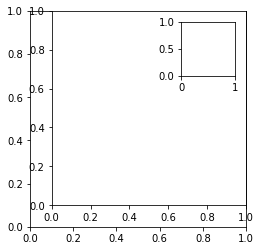

In [ ]:
fig = plt.figure(figsize=(3, 3))
outoutside = fig.add_axes([0,0,1,1])
outside = fig.add_axes([0.1,0.1,0.9,0.9])
inside= fig.add_axes([0.7,0.7,0.25,0.25])
#[a,b,c,d] a : 행 시작점 b : 열 시작점 c,d : 행, 열 길이

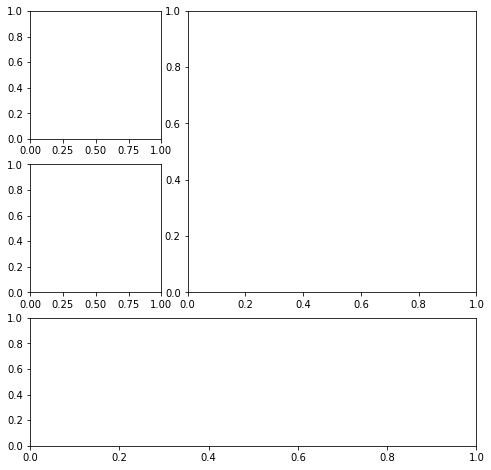

In [ ]:
#행으로 1,1 크기를 3개, 열로 1,1 크기를 3개 그릴수 있는데~
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0]) #1개
mid_left = fig.add_subplot(gs[1, 0]) #1개(열방향으로 생김)
top_right = fig.add_subplot(gs[:2, 1:]) #1,2 열방향크기 #행방향크기위치
bottom = fig.add_subplot(gs[2,:])

In [ ]:
#그림 저장하는거
fig.savefig('empty.png')

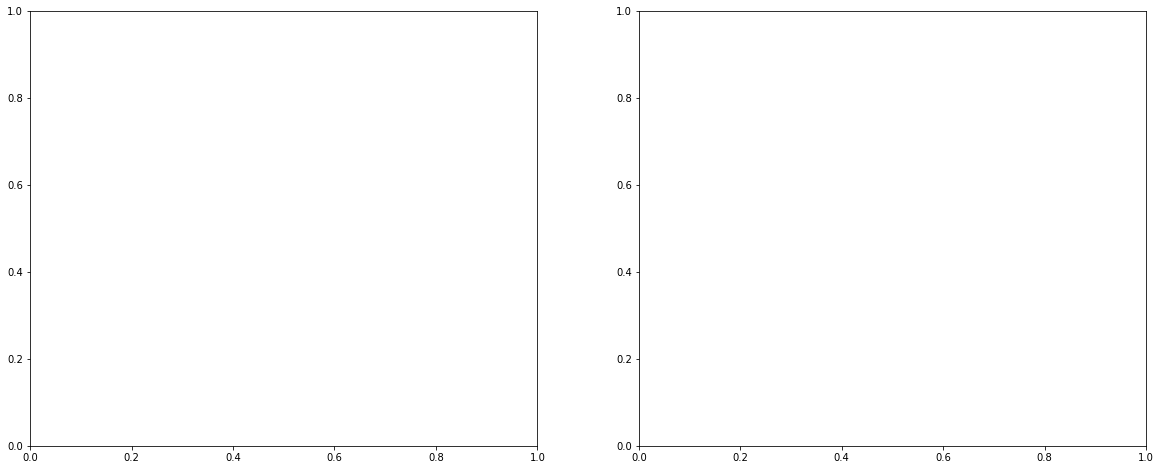

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

## 5.2장 plotting with pandas

In [ ]:
#데이터 ~
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

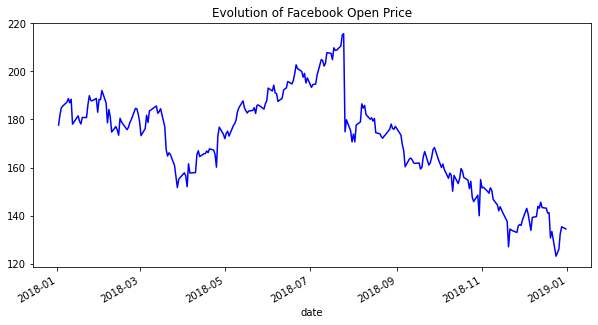

In [ ]:
#open으로 주식차트그리기
fb.plot(
    kind='line', #line형태로 그린다
    y='open', #y값을 뭘로할거냐 (x값은 자동 index로)
    figsize=(10, 5), #(width,height)
    color='blue', 
    linestyle='solid', #linestyle 뭫임?
    legend=False, #주석
    title='Evolution of Facebook Open Price'
)

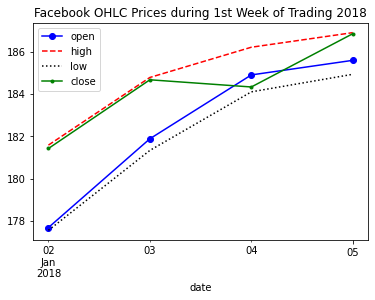

In [ ]:
fb.first('1W').plot(
    y=['open', 'high', 'low', 'close'],
    style=['o-b', '--r', ':k', '.-g'],
    #o-b : 파란색 점라인, --r은 빨간색 긴점선
    #:k : 블랙점선, ,-g는 작은 점라인
    title='Facebook OHLC Prices during 1st Week of Trading 2018'
).autoscale()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe15ab24b90>,
      dtype=object)

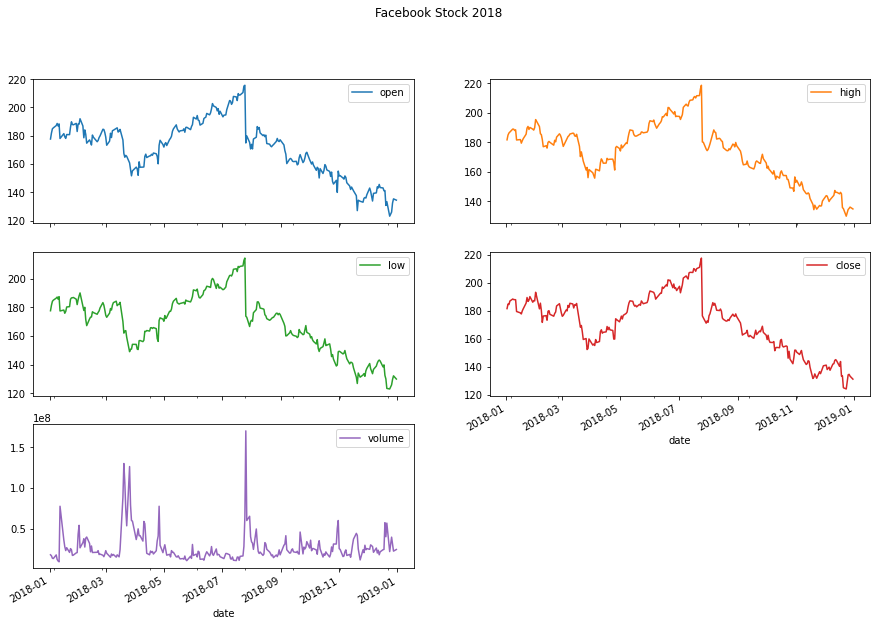

In [ ]:
#애초에 fb 컬럼이 5개니까 컬럼별로 그린다는 뜻같음
fb.plot(
    kind='line',
    subplots=True, #여기서 설정
    layout=(3, 2), #레이아웃 설정
    figsize=(15, 10),
    title='Facebook Stock 2018'
)

In [ ]:
#국가별 cases의 7일평균
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()

In [ ]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2020-01-18,18/01/2020,18,1,2020,0,0,Croatia,HR,HRV,4076246.00,Europe,0.00
2020-01-18,18/01/2020,18,1,2020,0,0,Greece,EL,GRC,10724599.00,Europe,0.00
2020-01-18,18/01/2020,18,1,2020,0,0,United_Kingdom,UK,GBR,66647112.00,Europe,0.00
2020-01-18,18/01/2020,18,1,2020,0,0,Azerbaijan,AZ,AZE,10047719.00,Europe,0.00
2020-01-18,18/01/2020,18,1,2020,0,0,Bahrain,BH,BHR,1641164.00,Asia,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-18,18/09/2020,18,9,2020,822,2,Denmark,DK,DNK,5806081.00,Europe,69.22
2020-09-18,18/09/2020,18,9,2020,4326,84,Iraq,IQ,IRQ,39309789.00,Asia,153.51
2020-09-18,18/09/2020,18,9,2020,90,0,Bahamas,BS,BHS,389486.00,America,203.09


In [ ]:
new_cases_rolling_average

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,45.43,156.86,270.00,18.43,57.14,0.00,0.00,10667.86,154.14,85.29,...,0.00,5.57,18.43,549.29,1035.86,2.00,0.00,3.71,109.00,78.43
2020-09-15,45.86,159.14,263.29,25.29,60.43,0.00,0.00,10963.57,160.57,82.57,...,0.00,4.43,17.00,583.57,1031.29,2.00,0.00,3.14,126.29,33.29
2020-09-16,47.86,159.86,256.57,25.29,65.43,0.00,0.00,11062.57,166.57,80.43,...,0.00,5.86,16.43,602.71,1013.14,1.29,0.00,3.14,123.86,26.86


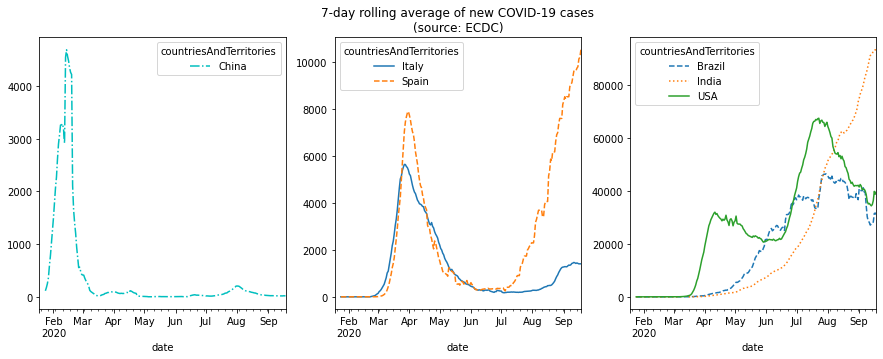

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['China']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

### 영역표시

다음은 조금 어려운 내용이니까 한글로 설명

새로운 코로나 19 사례의 전체 7일 평균과 각 국가가 총량에 기여하는 정도를 시각화

- 이탈리아와 스페인을 묶고
- 미국 브라질 인도 
- 이외의 국가를 위한 또 다른 범주

높이는 전체 값, 음영 영역의 높이는 개별 국가의 값

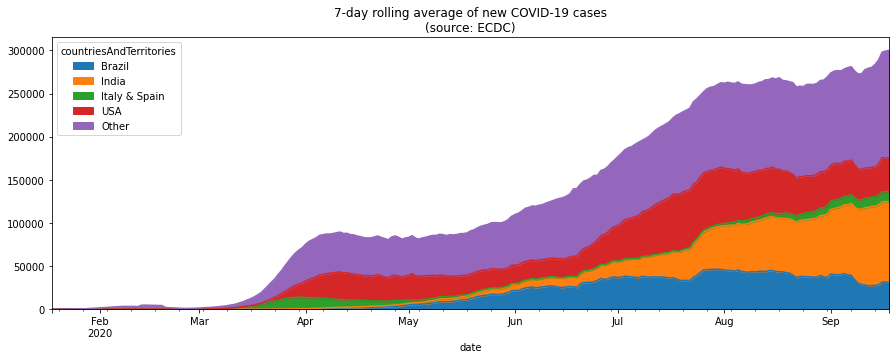

In [ ]:
cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['USA', 'Brazil', 'India', 'Italy & Spain']
] #해당 컬럼 이외의 컬럼들

new_cases_rolling_average.assign(
    **{'Italy & Spain': lambda x: x.Italy + x.Spain} #**을 넣는건 &라는 걸 사용하기 위함인듯
).sort_index(axis=1).assign(
    Other=lambda x: x[cols].sum(axis=1) #다른 컬럼들 합친거 만들고 기존 컬럼 삭제
).drop(columns=cols).plot(
    kind='area', figsize=(15, 5),  #kind가 이 그래프의 핵심
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

In [ ]:
#누적합(cumulative sum을 나라별로, 매일을기준으로 구하기)
covid.groupby(
    ['countriesAndTerritories', pd.Grouper(freq='1D')]
).cases.sum().unstack(0).apply('cumsum').tail(5)

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-09-14,38716.00,11353.00,48254.00,1344.00,3335.00,3.00,95.00,546468.00,45862.00,3046.00,...,509.00,1220.00,1808.00,47620.00,60540.00,1063.00,766.00,2013.00,13539.00,7526.00
2020-09-15,38815.00,11520.00,48496.00,1438.00,3388.00,3.00,95.00,555524.00,45969.00,3060.00,...,509.00,1221.00,1812.00,48192.00,61569.00,1063.00,766.00,2013.00,13720.00,7531.00
2020-09-16,38855.00,11672.00,48734.00,1438.00,3439.00,3.00,95.00,565432.00,46119.00,3152.00,...,509.00,1232.00,1827.00,48776.00,62655.00,1063.00,766.00,2016.00,13819.00,7576.00
2020-09-17,38872.00,11816.00,48966.00,1438.00,3569.00,3.00,95.00,577325.00,46376.00,3328.00,...,509.00,1238.00,1856.00,49385.00,63416.00,1063.00,766.00,2020.00,13887.00,7598.00
2020-09-18,38872.00,11948.00,49194.00,1483.00,3749.00,3.00,95.00,588999.00,46671.00,3382.00,...,509.00,1238.00,1876.00,49994.00,64284.00,1066.00,766.00,2023.00,13928.00,7633.00


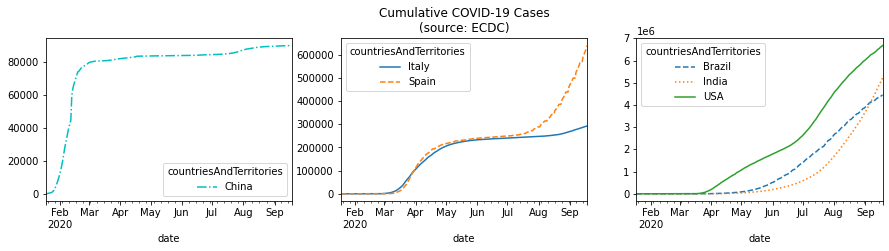

In [ ]:
#Cumulative 그래프를 그려보자
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

#그룹별로, 하루하루에 대해 SUM을 취한 뒤, 마지막에 cumsum으로 cumulative
cumulative_covid_cases = covid.groupby(
    ['countriesAndTerritories', pd.Grouper(freq='1D')]
).cases.sum().unstack(0).apply('cumsum') 

cumulative_covid_cases[['China']].plot(ax=axes[0], style='-.c')
cumulative_covid_cases[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='Cumulative COVID-19 Cases\n(source: ECDC)'
)
cumulative_covid_cases[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

### 변수관계 scatterplot

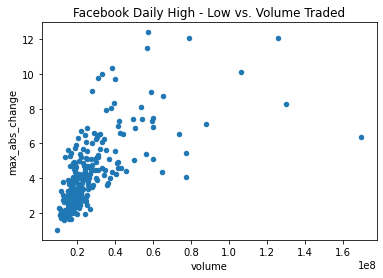

In [ ]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. Volume Traded'
)

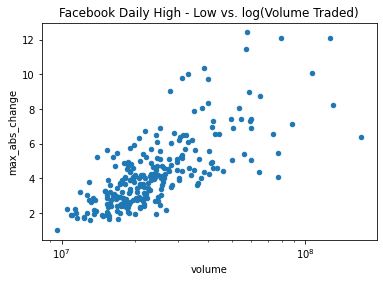

In [ ]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)', 
    logx=True #x축에대해 log변환 수행
)

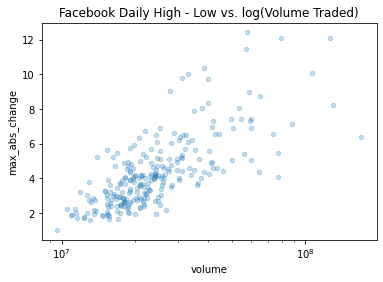

In [ ]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    logx=True, alpha=0.25
)

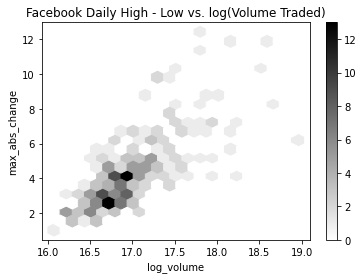

In [ ]:
fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).plot(
    kind='hexbin', #hexbin으로하면그 색상표처럼 출력가능
    x='log_volume',
    y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    colormap='gray_r',
    gridsize=20, #크기 
    sharex=False # we have to pass this to see the x-axis
)
#옆에 그라데이션 그래프는 지정할수가없나봐

### heatmap

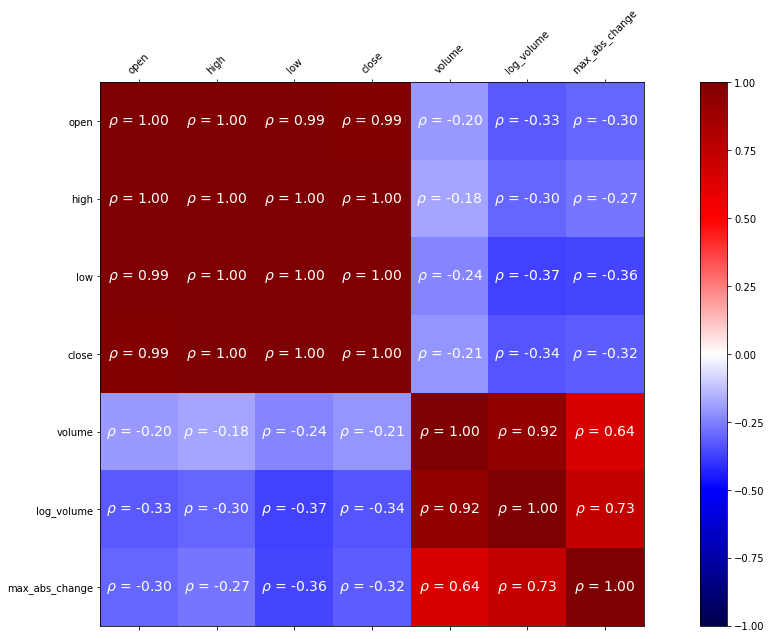

In [ ]:
#줏도모르겠지만 여튼 heatmap도 그릴수 있대!
fig, ax = plt.subplots(figsize=(20, 10))

# calculate the correlation matrix
fb_corr = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr()

# create the heatmap and colorbar
im = ax.matshow(fb_corr, cmap='seismic')
im.set_clim(-1, 1)
fig.colorbar(im)

# label the ticks with the column names
labels = [col.lower() for col in fb_corr.columns]
ax.set_xticks(ax.get_xticks()[1:-1]) # to handle bug in matplotlib
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(ax.get_yticks()[1:-1]) # to handle bug in matplotlib
ax.set_yticklabels(labels)

# include the value of the correlation coefficient in the boxes
for (i, j), coef in np.ndenumerate(fb_corr):
    ax.text(
        i, j, fr'$\rho$ = {coef:.2f}', # raw (r), format (f) string
        ha='center', va='center', 
        color='white', fontsize=14
    )

### heatmap

Text(0.5, 0, 'Volume traded')

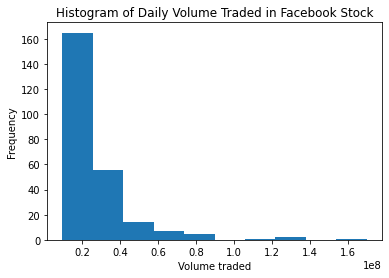

In [ ]:
fb.volume.plot(
    kind='hist', 
    title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded')

Text(0.5, 0, 'magnitude')

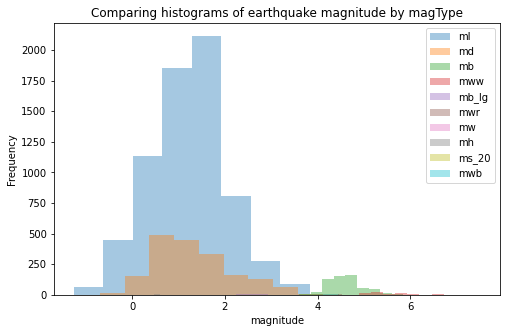

In [ ]:
#magtype별로 히스토그램
fig, axes = plt.subplots(figsize=(8, 5))

for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag
    if not data.empty:
        data.plot(
            kind='hist', ax=axes, alpha=0.4, #axes에 계속그린다!
            label=magtype, legend=True,
            title='Comparing histograms of earthquake magnitude by magType'
        )

plt.xlabel('magnitude') # label the x-axis (discussed in chapter 6)

### pdf

Text(0.5, 0, 'Price ($)')

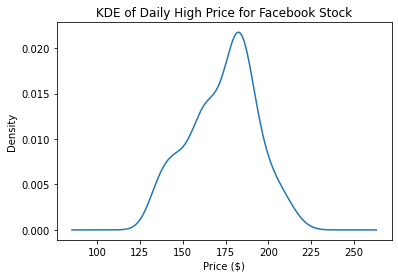

In [ ]:
#PDF(probability density function)
fb.high.plot(
    kind='kde', 
    title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price ($)')

Text(0.5, 0, 'Price ($)')

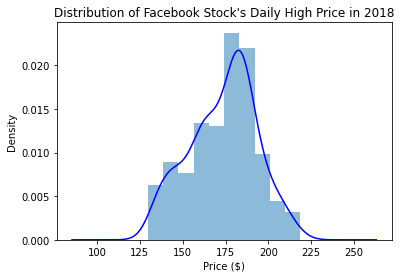

In [ ]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
    ax=ax, kind='kde', color='blue', #ax=ax로 지정했기대문에 같은 곳에 그린다
    title='Distribution of Facebook Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price ($)')

### ECDF

Text(0.5, 1.0, 'P(mag <= 3) = 98%')

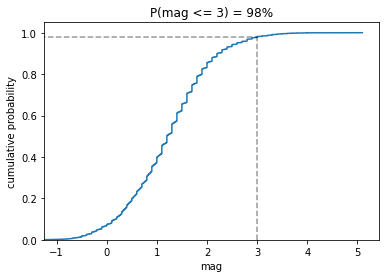

In [ ]:
#empirical cumulative distribution function
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# formatting below will all be covered in chapter 6
# axis labels
plt.xlabel('mag') # add x-axis label 
plt.ylabel('cumulative probability') # add y-axis label

# add reference lines for interpreting the ECDF for mag <= 3 
plt.plot(
    [3, 3], [0, .98], '--k', 
    [-1.5, 3], [0.98, 0.98], '--k', alpha=0.4
)

# set axis ranges
plt.ylim(0, None)
plt.xlim(-1.25, None)

# add a title
plt.title('P(mag <= 3) = 98%')

### BOXplot

Text(0, 0.5, 'price ($)')

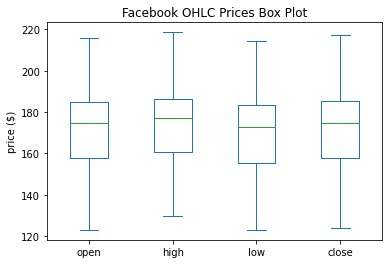

In [ ]:
#box plot
fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Box Plot')
plt.ylabel('price ($)')

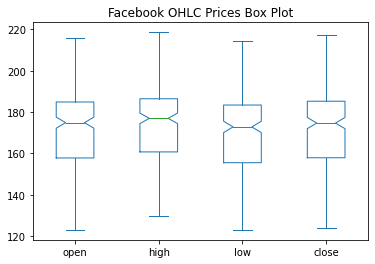

In [ ]:
#좀더 그래프가 귀여움 ㅋ ㅋ
#notch represents a 95% confidence interval around the medianf
fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Box Plot', notch=True)

Text(0.5, 1.1, 'Facebook OHLC Box Plots by Volume Traded')

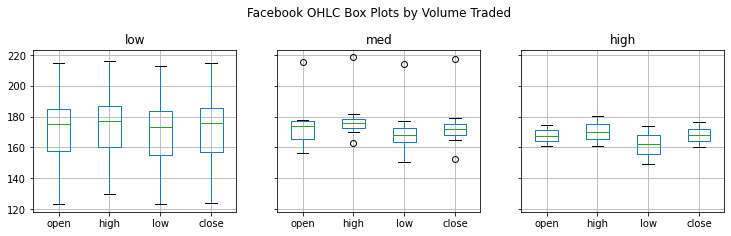

In [ ]:
#groupby + boxplot
fb.assign(
    volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])
).groupby('volume_bin').boxplot(
    column=['open', 'high', 'low', 'close'], #columns 아님
    layout=(1, 3), figsize=(12, 3)
)
plt.suptitle('Facebook OHLC Box Plots by Volume Traded', y=1.1)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'magnitude')

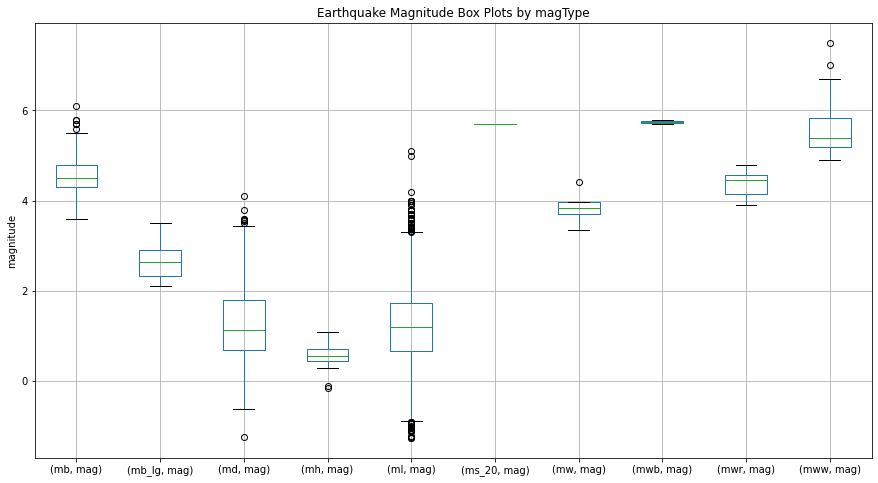

In [ ]:
quakes[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Box Plots by magType')
plt.ylabel('magnitude')

In [ ]:
quakes.parsed_place.value_counts().iloc[14::-1,]

Wyoming                 42
Canada                  55
Japan                   57
Dominican Republic      57
Fiji                    61
Utah                    67
Idaho                   71
Indonesia              147
Washington             157
Montana                204
Puerto Rico            216
Hawaii                 367
Nevada                 681
California            2861
Alaska                3665
Name: parsed_place, dtype: int64

### barh plot

Text(0.5, 0, 'earthquakes')

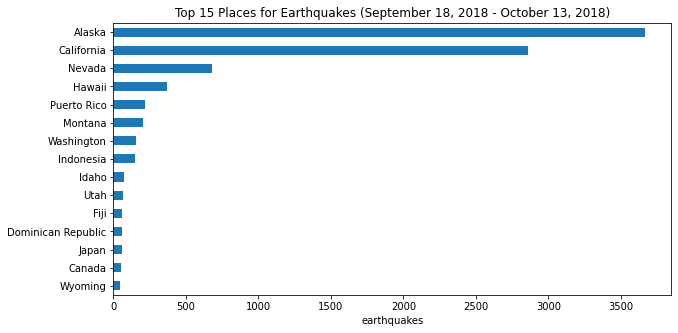

In [ ]:
#quakes.parsed_place.value_counts().iloc[14::-1,]는 상위 몇개를 ㅁㄴㅇ룸너랸ㅁㅇ뭐야

quakes.parsed_place.value_counts().iloc[14::-1,].plot(
    kind='barh', figsize=(10, 5), #barh가아니라 bar로하면 세로그래프
    title='Top 15 Places for Earthquakes '
          '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('earthquakes')

Text(0.5, 0, 'tsunamis')

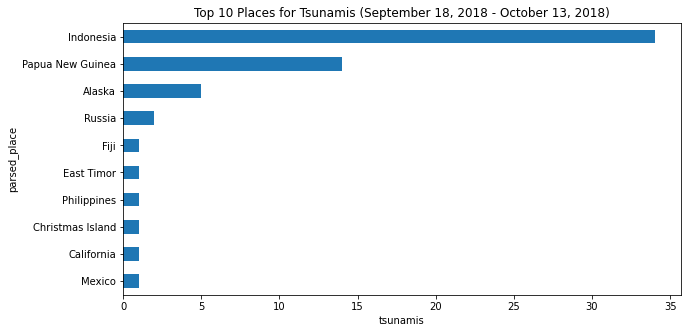

In [ ]:
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10:,].plot(
    kind='barh', figsize=(10, 5), 
    title='Top 10 Places for Tsunamis '
          '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('tsunamis') # label the x-axis (discussed in chapter 6)

### barplot (2 variable more)

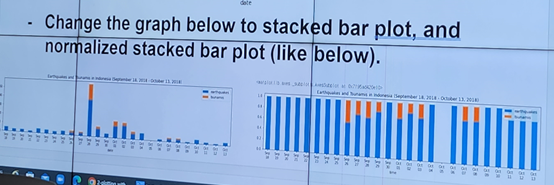

Text(0, 0.5, 'count')

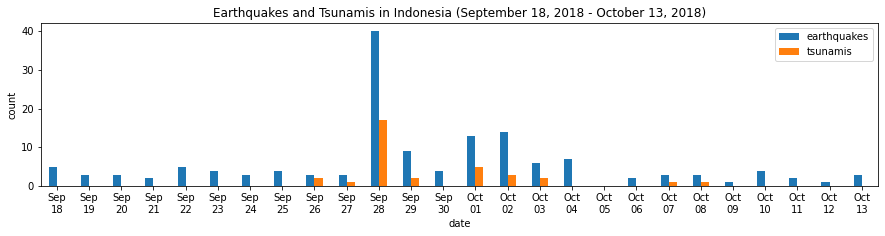

In [ ]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)



# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

In [ ]:
#수업시간
#graph below to stacked barplot and normalized stacked bar plot (like below)

indonesia_quakes.plot(y=['earthquake','tsunami'],kind='bar',figsize=(15,3),
                      rot=0,label=['earthquakes','tsunamis'],
                      title='Earthquakes and Tsunamis in indonesia(September 1B, 2018,October 13, 2018)',stacked=True)

In [ ]:
Indonesia_quakes[['tsunami','earthquake']].apply(lambda x:x / x.sum(),axis=1).plot(
    y=['earthquake','tsunami'],kind='bar',figsize=(15,3),
    rot=0,label=['earthquakes','tsunami'],title='Earthmosigi',stacked=True
)

Text(0, 0.5, '')

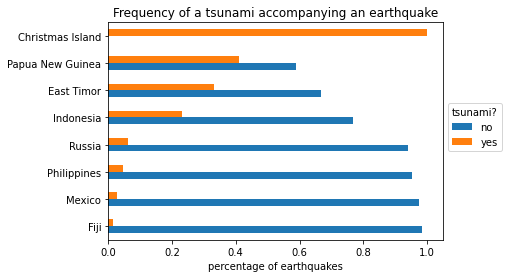

In [ ]:
quakes.groupby(['parsed_place', 'tsunami']).mag.count()\
    .unstack().apply(lambda x: x / x.sum(), axis=1)\
    .rename(columns={0: 'no', 1: 'yes'})\
    .sort_values('yes', ascending=False)[7::-1]\
    .plot.barh(
        title='Frequency of a tsunami accompanying an earthquake'
    )

# move legend to the right of the plot
plt.legend(title='tsunami?', bbox_to_anchor=(1, 0.65))

# label the axes (discussed in chapter 6)
plt.xlabel('percentage of earthquakes')
plt.ylabel('')

Text(0, 0.5, 'earthquakes')

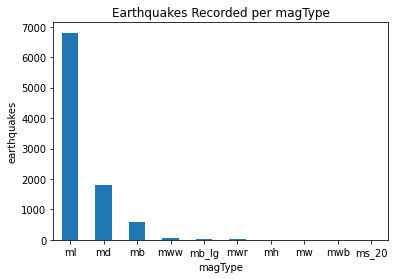

In [ ]:
quakes.magType.value_counts().plot(
    kind='bar', title='Earthquakes Recorded per magType', rot=0
)

# label the axes (discussed in chapter 6)
plt.xlabel('magType')
plt.ylabel('earthquakes')

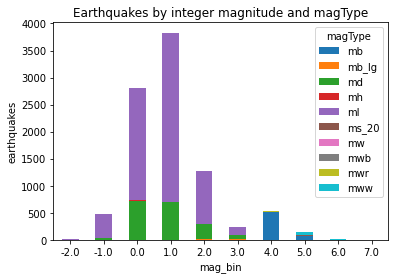

In [ ]:
pivot = quakes.assign(
    mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
    index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
    stacked=True, rot=0, ylabel='earthquakes', 
    title='Earthquakes by integer magnitude and magType'
)

Text(0, 0.5, 'percentage')

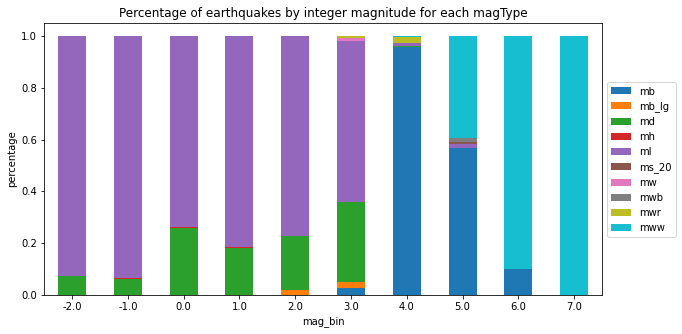

In [ ]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x / x.sum(), axis=1)
ax = normalized_pivot.plot.bar(
    stacked=True, rot=0, figsize=(10, 5),
    title='Percentage of earthquakes by integer magnitude for each magType'
)
ax.legend(bbox_to_anchor=(1, 0.8)) # move legend to the right of the plot
plt.ylabel('percentage') # label the axes (discussed in chapter 6)

Text(0, 0.5, '')

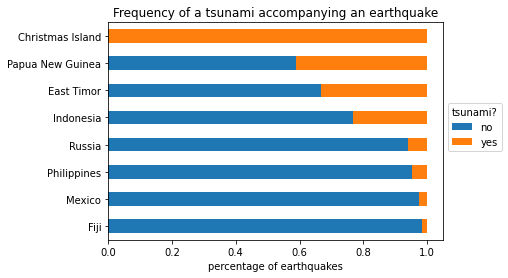

In [ ]:
quakes.groupby(['parsed_place', 'tsunami']).mag.count()\
    .unstack().apply(lambda x: x / x.sum(), axis=1)\
    .rename(columns={0: 'no', 1: 'yes'})\
    .sort_values('yes', ascending=False)[7::-1]\
    .plot.barh(
        title='Frequency of a tsunami accompanying an earthquake', 
        stacked=True
    )

# move legend to the right of the plot
plt.legend(title='tsunami?', bbox_to_anchor=(1, 0.65))

# label the axes (discussed in chapter 6)
plt.xlabel('percentage of earthquakes')
plt.ylabel('')

##5.3 pandas plotting module

In [ ]:
fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe15814cbd0>,
      dtype=object)

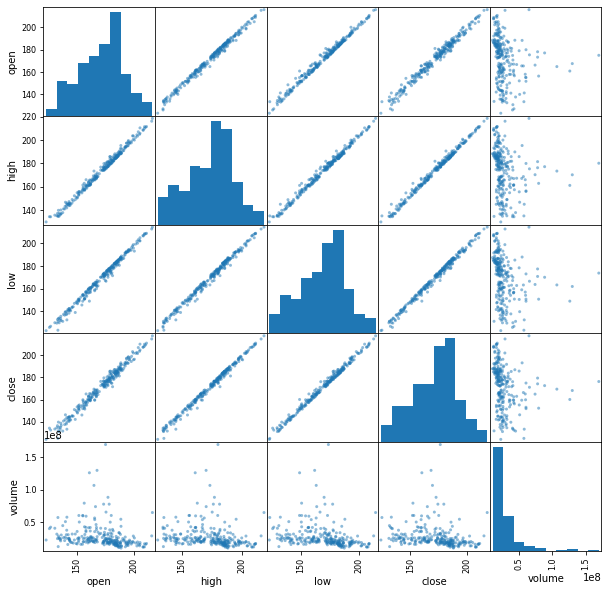

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe157fde910>,
      dtype=object)

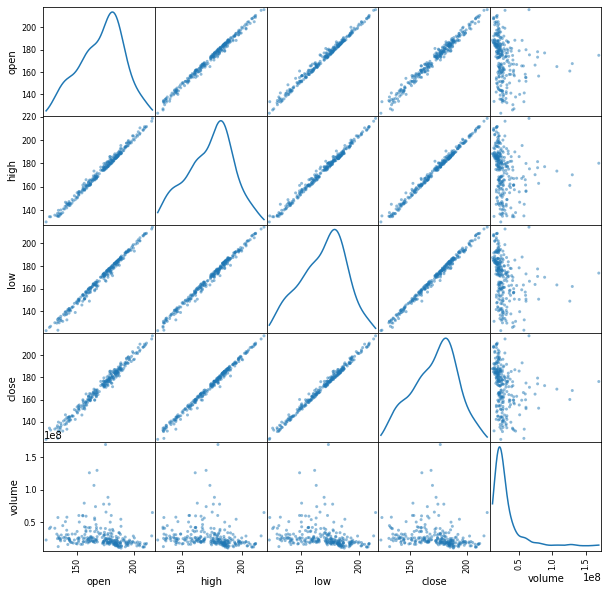

In [ ]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

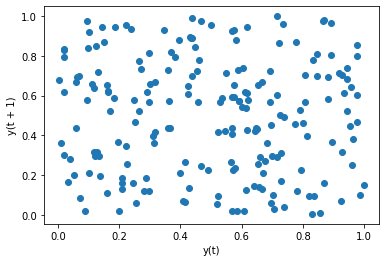

In [ ]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

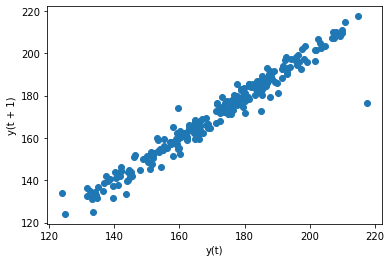

In [ ]:
lag_plot(fb.close)

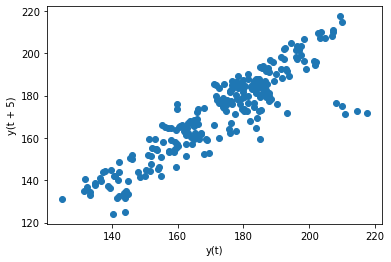

In [ ]:
lag_plot(fb.close, lag=5)

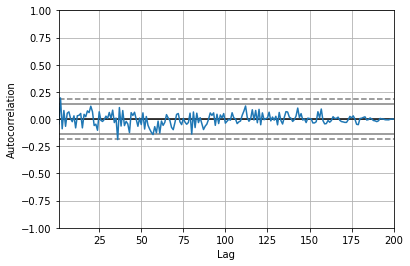

In [ ]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))

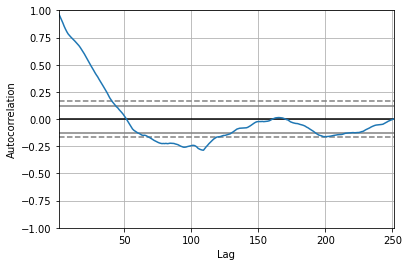

In [ ]:
autocorrelation_plot(fb.close)

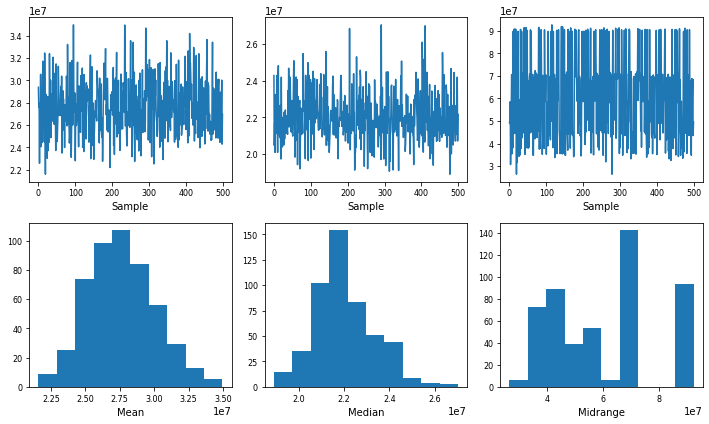

In [ ]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))

# 5장 실습

In [ ]:
os.chdir('/content/mydrive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05')

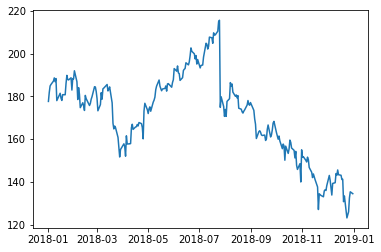

In [ ]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

plt.plot(fb.index, fb.open)
plt.show()

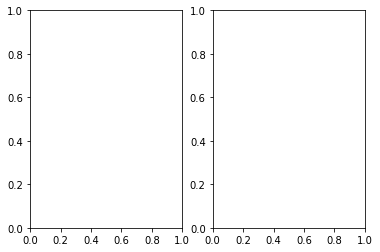

In [ ]:

fig, axes = plt.subplots(1,2)

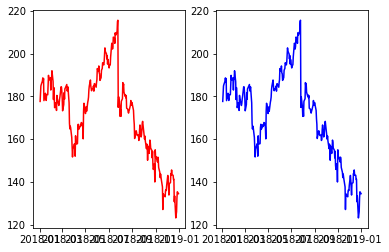

In [ ]:

fig, axes = plt.subplots(1,2)
axes[0].plot(fb.index,fb.open,'-r')
axes[1].plot(fb.index,fb.open,'-b')

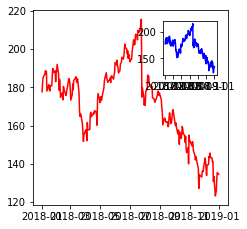

In [ ]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])
outside.plot(fb.index,fb.open,'-r')
inside.plot(fb.index,fb.open,'-b')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [ ]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()

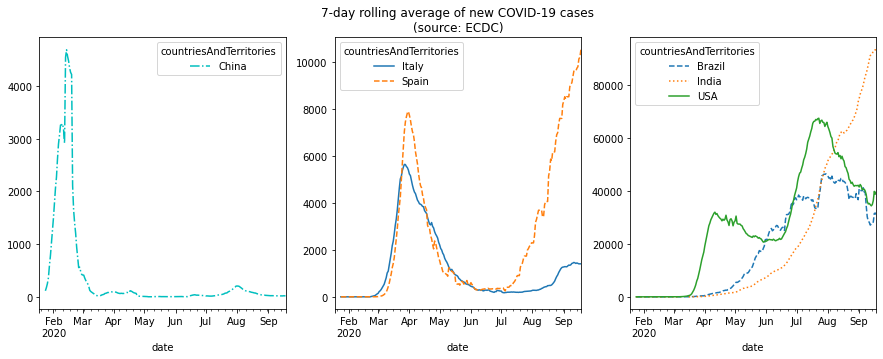

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['China']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

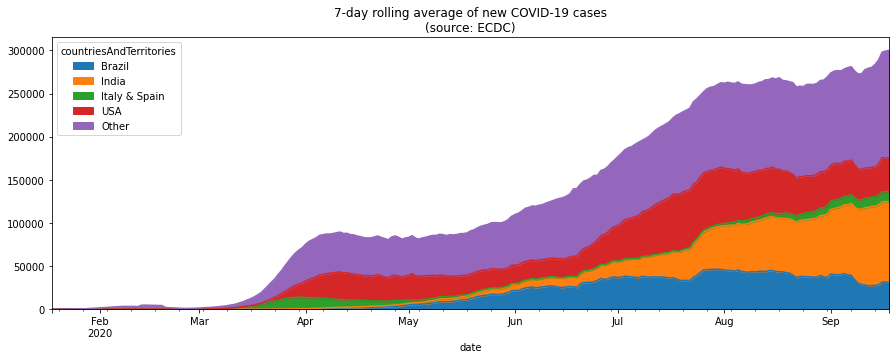

In [ ]:
cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['USA', 'Brazil', 'India', 'Italy & Spain']
]
new_cases_rolling_average.assign(
    **{'Italy & Spain': lambda x: x.Italy + x.Spain}
).sort_index(axis=1).assign(
    Other=lambda x: x[cols].sum(axis=1)
).drop(columns=cols).plot(
    kind='area', figsize=(15, 5), 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

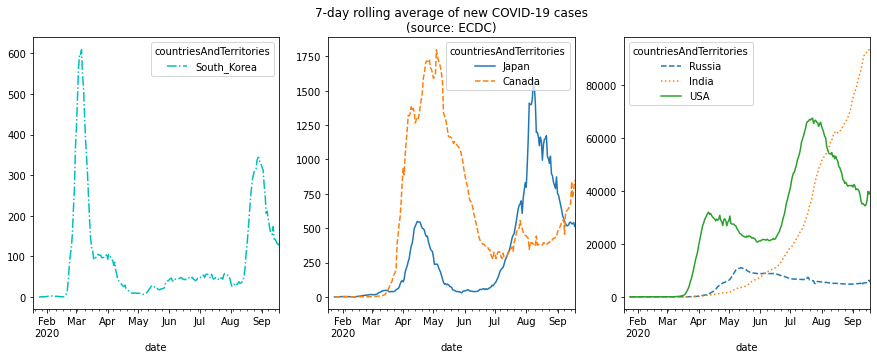

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['South_Korea']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Japan', 'Canada']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Russia', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

In [ ]:
new_cases_rolling_average

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,45.43,156.86,270.00,18.43,57.14,0.00,0.00,10667.86,154.14,85.29,...,0.00,5.57,18.43,549.29,1035.86,2.00,0.00,3.71,109.00,78.43
2020-09-15,45.86,159.14,263.29,25.29,60.43,0.00,0.00,10963.57,160.57,82.57,...,0.00,4.43,17.00,583.57,1031.29,2.00,0.00,3.14,126.29,33.29
2020-09-16,47.86,159.86,256.57,25.29,65.43,0.00,0.00,11062.57,166.57,80.43,...,0.00,5.86,16.43,602.71,1013.14,1.29,0.00,3.14,123.86,26.86


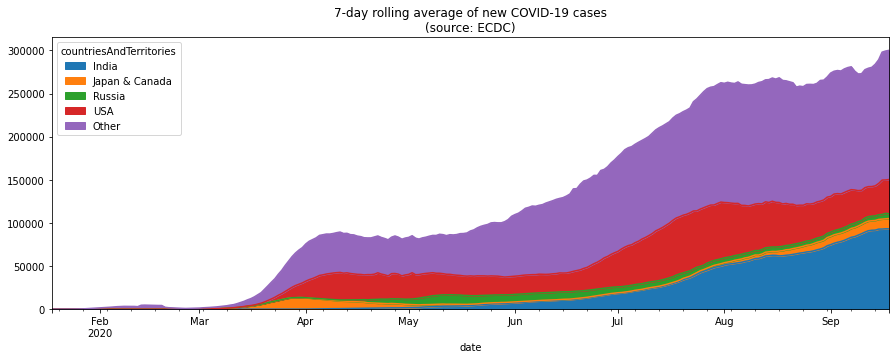

In [ ]:
cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['Japan & Canada', 'Russia','India','USA']
]
cols2 = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['Japan', 'Canada', 'Russia','India','USA']
]
new_cases_rolling_average.assign(
    **{'Japan & Canada': lambda x: x.Italy + x.Spain}
).sort_index(axis=1).assign(
    Other=lambda x: x[cols].sum(axis=1)
).drop(columns=cols).plot(
    kind='area', figsize=(15, 5), 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

Text(0, 0.5, 'count')

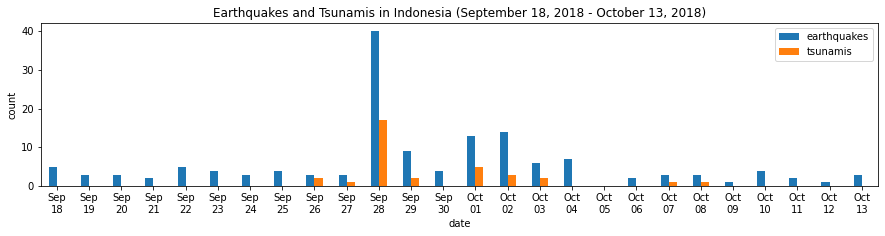

In [ ]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake','tsunami'], kind='bar', figsize=(15, 3),
        rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

Text(0, 0.5, 'count')

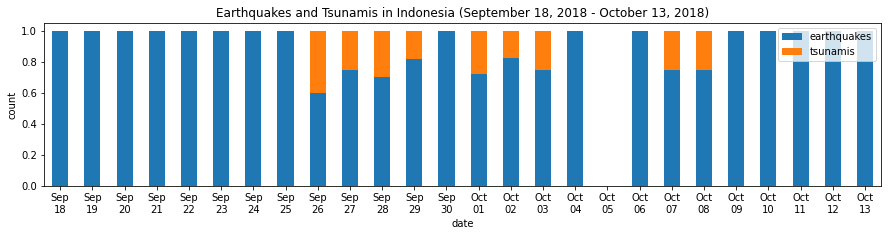

In [ ]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')
indonesia_quakes[['tsunami','earthquake']].apply(lambda x: x / x.sum(), axis=1).plot(
    y=['earthquake','tsunami'], kind='bar', figsize=(15, 3),
        rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)',
          stacked='True')


# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

Text(0, 0.5, 'count')

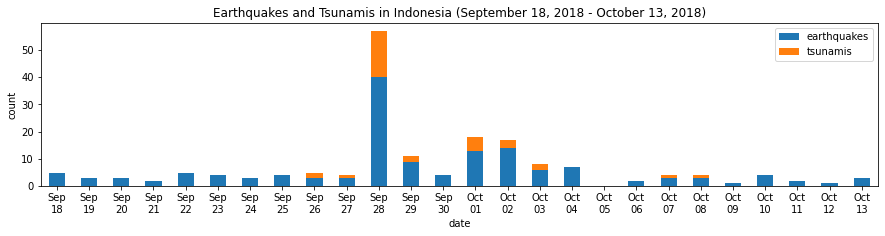

In [ ]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake','tsunami'], kind='bar', figsize=(15, 3),
        rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)',
          stacked='normalize'
)


# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')